In [2]:
project_dir = '/home/rabreu/projeto_multimodal/'
data_dir = project_dir+'data/'

audioset_indices_csv = project_dir+'segments/subset_class_labels_indices.csv'

## pegando dataset desbalanceado, que eu balanceei para 600 ocorrências para cada classe
audioset_train_csv = project_dir+'segments/600max_subset_unbalanced_train_segments.csv'
train_sub_dir = 'unbalanced_train/audio' # estou lendo em aac pois o linux suporta, no windows tem que ser wav

audioset_eval_csv = project_dir+'segments/subset_eval_segments.csv'
eval_sub_dir = 'eval/audio'


In [3]:
def extract_feature(file_name):
    ## caso librosa.load não funcione, usse esse código
    #data, sample_rate = sf.read(file_name, dtype='float32')
    #data = data.T
    # X = librosa.resample(data, sample_rate, 22050)
    #X = librosa.to_mono(X)
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [19]:
def parse_audio_files(parent_dir,sub_dir,csv_file,file_ext='*.wav'):
    ### HARDCODED VALUE: 193 dimension for the audio features
    # 193 is how big the features  array needs to be once it has
    # extracted all the necessary features from each audio file
    features, labels = np.empty((0,193)), np.empty(0)
    file_labels = []
    count  = 0
    for fn in natural_sort(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))):
        # The print() calls here are just for debugging. Feel free to remove them.
        print('Processing Index #' + str(count))
        #print(fn)
        mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        print('features for ' + fn + ' extracted.')
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        #print('features horizontally stacked for numpy array')
        features = np.vstack([features, ext_features])
        #print('features vertically stacked to pre-existing features array')
        #print('features numpy array size = ' + str(features.size))
        
        # Need to get the labels for each clip from the CSV file
        rownum = fn.split(sub_dir)[1].split('/')[1].split('_')[0]
        print('rownum = ' + str(rownum))
        labels = (get_file_name_labels_from_audioset_csv(rownum,csv_file))
        print('Labels = '+str(labels))
        file_labels.append(labels)

        count += 1

    return np.array(features), np.array(file_labels)



### Salvando dados em arquivo

In [12]:
## só use este pedaço de código para salvar os dados. Caso tenha salvo pode pular ele

features, labels = parse_audio_files(data_dir,train_sub_dir,audioset_train_csv,"*.aac")
save_dir = data_dir+train_sub_dir+"/features/"
assure_path_exists(save_dir)
save_files(save_dir,features,labels)


features, labels = parse_audio_files(data_dir,eval_sub_dir,audioset_eval_csv,"*.aac")
save_dir = data_dir+eval_sub_dir+"/features/"
assure_path_exists(save_dir)
save_files(save_dir,features,labels)

Processing Index #0
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/0_-iSwmbSS9TA.aac extracted.
rownum = 0
Labels = [5]
Processing Index #1
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1_7UC6F9xm8nw.aac extracted.
rownum = 1
Labels = [0, 3]
Processing Index #2
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2_7TQwJ8LQz4A.aac extracted.
rownum = 2
Labels = [6]
Processing Index #3
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3_1grT1gN5v8U.aac extracted.
rownum = 3
Labels = [2]
Processing Index #4
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/4_OI5FodTedic.aac extracted.
rownum = 4
Labels = [0, 1]
Processing Index #5
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/5_Fr0UKnvvaTc.aac extracted.
rownum = 5
Labels = [2, 1]
Processing Index #6
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/6_OYHJKP9Dvak.aac extr

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/58_-88hDH6LtyI.aac extracted.
rownum = 58
Labels = [2]
Processing Index #56
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/59_-w3ye6WDomI.aac extracted.
rownum = 59
Labels = [0]
Processing Index #57
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/60_d8U82NbIC98.aac extracted.
rownum = 60
Labels = [4, 0]
Processing Index #58
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/61_3DMxZ4yWWYE.aac extracted.
rownum = 61
Labels = [6]
Processing Index #59
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/62_4u6Ac_h9ZVw.aac extracted.
rownum = 62
Labels = [6]
Processing Index #60
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/63_3YI6A9-zqJM.aac extracted.
rownum = 63
Labels = [6]
Processing Index #61
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/64_Rvuv1C7d_Ho.aac extracted.


features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/115_3ObiWREjhV8.aac extracted.
rownum = 115
Labels = [0]
Processing Index #111
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/116_3dlDW5rwkS8.aac extracted.
rownum = 116
Labels = [0, 3]
Processing Index #112
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/117_vL1goz4n82k.aac extracted.
rownum = 117
Labels = [4, 0]
Processing Index #113
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/118_Ad1tLpeIKUQ.aac extracted.
rownum = 118
Labels = [2, 1]
Processing Index #114
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/119_93GEJcSChdo.aac extracted.
rownum = 119
Labels = [4, 0]
Processing Index #115
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/120_3IxFmFcf5jI.aac extracted.
rownum = 120
Labels = [0]
Processing Index #116
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/121

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/171_0EgJ1v2Yuy4.aac extracted.
rownum = 171
Labels = [0]
Processing Index #165
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/172_3N708mf38Ck.aac extracted.
rownum = 172
Labels = [0]
Processing Index #166
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/173_IJWXr8cdCDs.aac extracted.
rownum = 173
Labels = [0, 3]
Processing Index #167
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/174_CK1YnqP1Y1I.aac extracted.
rownum = 174
Labels = [1]
Processing Index #168
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/175_DHRjvyK0Ioo.aac extracted.
rownum = 175
Labels = [5]
Processing Index #169
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/176_56XhsjvhfYs.aac extracted.
rownum = 176
Labels = [1]
Processing Index #170
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/178_2mQret4K

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/228_E6HdMu2C-gU.aac extracted.
rownum = 228
Labels = [0, 3]
Processing Index #219
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/229_0Ax39UPWoyY.aac extracted.
rownum = 229
Labels = [6]
Processing Index #220
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/230_-On56ZENnOU.aac extracted.
rownum = 230
Labels = [0]
Processing Index #221
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/231_Fb1yUJr_cAE.aac extracted.
rownum = 231
Labels = [2, 1]
Processing Index #222
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/232_03yAuTazipw.aac extracted.
rownum = 232
Labels = [0]
Processing Index #223
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/233_5Zrnvl_6c3U.aac extracted.
rownum = 233
Labels = [2]
Processing Index #224
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/234_7olxm

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/283_8gvTkR8gcxk.aac extracted.
rownum = 283
Labels = [0, 3]
Processing Index #273
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/284_-JaUsb1_IbI.aac extracted.
rownum = 284
Labels = [2]
Processing Index #274
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/285_286Fze2rNms.aac extracted.
rownum = 285
Labels = [2, 1]
Processing Index #275
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/286_8Q3Lazeug88.aac extracted.
rownum = 286
Labels = [6]
Processing Index #276
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/287_1VLiTdN2udY.aac extracted.
rownum = 287
Labels = [0, 3]
Processing Index #277
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/288_ByBXHNwJNeo.aac extracted.
rownum = 288
Labels = [0, 3]
Processing Index #278
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/289

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/338_14e6ciQ_1vg.aac extracted.
rownum = 338
Labels = [0]
Processing Index #327
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/340_02ikq8Cwnog.aac extracted.
rownum = 340
Labels = [0]
Processing Index #328
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/341_6XFRIEPiFXk.aac extracted.
rownum = 341
Labels = [2, 1]
Processing Index #329
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/342_C1dXq04kxKc.aac extracted.
rownum = 342
Labels = [2, 1]
Processing Index #330
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/343_3He2mnmYBZs.aac extracted.
rownum = 343
Labels = [0]
Processing Index #331
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/344_39lhrblviZ4.aac extracted.
rownum = 344
Labels = [0, 3]
Processing Index #332
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/345_RS

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/395_8Xy360yzS24.aac extracted.
rownum = 395
Labels = [6]
Processing Index #381
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/396_-aaioeAeE84.aac extracted.
rownum = 396
Labels = [6]
Processing Index #382
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/397_3Q6bR-1HMSQ.aac extracted.
rownum = 397
Labels = [0]
Processing Index #383
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/398_Gcp1yM7U_PY.aac extracted.
rownum = 398
Labels = [1]
Processing Index #384
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/399_6kTDispTOQA.aac extracted.
rownum = 399
Labels = [5]
Processing Index #385
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/400_7lWBxaOa-gw.aac extracted.
rownum = 400
Labels = [2]
Processing Index #386
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/401_LTxbauzCL-w

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/451_ETd8OCXVvkM.aac extracted.
rownum = 451
Labels = [4, 0]
Processing Index #435
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/452_5tAQweacu1Q.aac extracted.
rownum = 452
Labels = [6]
Processing Index #436
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/453_3SvhV5fApNE.aac extracted.
rownum = 453
Labels = [0, 3]
Processing Index #437
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/454_7vE3unkkaVA.aac extracted.
rownum = 454
Labels = [2]
Processing Index #438
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/455_E0d7qwfJFeY.aac extracted.
rownum = 455
Labels = [1]
Processing Index #439
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/456_6R0-bmMN_8Q.aac extracted.
rownum = 456
Labels = [5]
Processing Index #440
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/457_4L9fH

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/507_5dke_Awm1I8.aac extracted.
rownum = 507
Labels = [2]
Processing Index #489
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/508_4quR8wm-wiI.aac extracted.
rownum = 508
Labels = [4, 0]
Processing Index #490
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/509_CtMgnu8GBWQ.aac extracted.
rownum = 509
Labels = [4, 0]
Processing Index #491
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/510_1EkS_SNmvm0.aac extracted.
rownum = 510
Labels = [2]
Processing Index #492
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/511_1V-v2xC6XRU.aac extracted.
rownum = 511
Labels = [4, 0]
Processing Index #493
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/512_-Fk8xFRW79k.aac extracted.
rownum = 512
Labels = [0]
Processing Index #494
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/513_HM

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/563_A9UHx8muxXs.aac extracted.
rownum = 563
Labels = [5]
Processing Index #543
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/564_Wn6hK20p7As.aac extracted.
rownum = 564
Labels = [5, 4]
Processing Index #544
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/565_KzozAl15sAw.aac extracted.
rownum = 565
Labels = [0, 3]
Processing Index #545
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/566_C7yZovKH0Jg.aac extracted.
rownum = 566
Labels = [0, 3, 2]
Processing Index #546
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/567_6-Lv8Se5fMk.aac extracted.
rownum = 567
Labels = [6]
Processing Index #547
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/568_1-c02i_s1g8.aac extracted.
rownum = 568
Labels = [6]
Processing Index #548
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/569

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/621_0k2sJx7E3Qk.aac extracted.
rownum = 621
Labels = [1]
Processing Index #597
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/622_7hWENAfcY0U.aac extracted.
rownum = 622
Labels = [1]
Processing Index #598
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/623_69nE-KI-W8k.aac extracted.
rownum = 623
Labels = [6]
Processing Index #599
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/624_0J0uMddRv0Y.aac extracted.
rownum = 624
Labels = [0]
Processing Index #600
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/625_27lYMGDot1s.aac extracted.
rownum = 625
Labels = [0]
Processing Index #601
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/626_AEPQ7O7-2Vk.aac extracted.
rownum = 626
Labels = [5]
Processing Index #602
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/627_4tyGWo--YEM

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/679_6Aa4O0STR2k.aac extracted.
rownum = 679
Labels = [6]
Processing Index #651
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/680_Rxw7eLBHDO0.aac extracted.
rownum = 680
Labels = [4, 0]
Processing Index #652
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/681_JRcinz6NJKI.aac extracted.
rownum = 681
Labels = [4, 0]
Processing Index #653
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/682_0ExdbGAMUb8.aac extracted.
rownum = 682
Labels = [0]
Processing Index #654
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/683_HBrjslGlVsE.aac extracted.
rownum = 683
Labels = [2, 1]
Processing Index #655
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/684_9HUHatlTjMY.aac extracted.
rownum = 684
Labels = [5]
Processing Index #656
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/685_Ma

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/735_QTESQTLM-qg.aac extracted.
rownum = 735
Labels = [2, 1]
Processing Index #705
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/736_1WYMOua6Bj4.aac extracted.
rownum = 736
Labels = [2, 1]
Processing Index #706
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/737_MlkqBjJebyo.aac extracted.
rownum = 737
Labels = [2, 1]
Processing Index #707
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/738_THmblmku1g0.aac extracted.
rownum = 738
Labels = [4, 0]
Processing Index #708
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/739_8LqRGBN0dKU.aac extracted.
rownum = 739
Labels = [2, 1]
Processing Index #709
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/740_0F87ERBM2RI.aac extracted.
rownum = 740
Labels = [2]
Processing Index #710
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/791_5Jx4ngx5WEo.aac extracted.
rownum = 791
Labels = [5]
Processing Index #759
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/792_Dh99fAvwjMc.aac extracted.
rownum = 792
Labels = [0, 3]
Processing Index #760
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/793_7fWc1XYNUnk.aac extracted.
rownum = 793
Labels = [5]
Processing Index #761
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/794_4w2VMA2pdYo.aac extracted.
rownum = 794
Labels = [5]
Processing Index #762
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/795_Nd2Q9HhrY_4.aac extracted.
rownum = 795
Labels = [1]
Processing Index #763
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/796_Ol-XhsCaC8I.aac extracted.
rownum = 796
Labels = [0, 3]
Processing Index #764
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/797_-8_WW

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/847_5VbsY0BY764.aac extracted.
rownum = 847
Labels = [2]
Processing Index #813
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/848_6cwXFTkvnEg.aac extracted.
rownum = 848
Labels = [6]
Processing Index #814
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/849_-Yl6CTpfAFs.aac extracted.
rownum = 849
Labels = [0, 3]
Processing Index #815
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/850_1Nv5hELfN6U.aac extracted.
rownum = 850
Labels = [0, 3]
Processing Index #816
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/852_VXxAxgU6AUs.aac extracted.
rownum = 852
Labels = [5, 4]
Processing Index #817
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/853_0sp4zI5ohiI.aac extracted.
rownum = 853
Labels = [0]
Processing Index #818
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/854_NF

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/910_Nwd_UTGfOPQ.aac extracted.
rownum = 910
Labels = [0, 3]
Processing Index #867
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/911_2_HrVmVAAvE.aac extracted.
rownum = 911
Labels = [6]
Processing Index #868
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/912_-fCYj-cFQ5A.aac extracted.
rownum = 912
Labels = [5]
Processing Index #869
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/913_7r2U4BGiRBw.aac extracted.
rownum = 913
Labels = [5]
Processing Index #870
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/915_3kh3LkkHyxA.aac extracted.
rownum = 915
Labels = [0]
Processing Index #871
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/916_h3UhoHIMfpw.aac extracted.
rownum = 916
Labels = [4, 0]
Processing Index #872
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/917_91vwx

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/967_5raLaNGUBM4.aac extracted.
rownum = 967
Labels = [2, 1]
Processing Index #921
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/968_1_dOjpjRcF8.aac extracted.
rownum = 968
Labels = [0]
Processing Index #922
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/969_3GOPuz1NFnA.aac extracted.
rownum = 969
Labels = [0]
Processing Index #923
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/970_2iG_e4x7W-k.aac extracted.
rownum = 970
Labels = [6]
Processing Index #924
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/971_3jfzrb6_ut4.aac extracted.
rownum = 971
Labels = [0]
Processing Index #925
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/972_THE3cwtU4aw.aac extracted.
rownum = 972
Labels = [2, 1]
Processing Index #926
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/973_0QuAG

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1024_HlNqoVpZbaQ.aac extracted.
rownum = 1024
Labels = [4, 0]
Processing Index #975
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1025_NWZK4Mm3aNc.aac extracted.
rownum = 1025
Labels = [1]
Processing Index #976
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1026_4QqyN2_j47k.aac extracted.
rownum = 1026
Labels = [0, 3]
Processing Index #977
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1027_6hsWDnZ6clk.aac extracted.
rownum = 1027
Labels = [2, 1]
Processing Index #978
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1028_3zCK2pKU4yg.aac extracted.
rownum = 1028
Labels = [2]
Processing Index #979
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1029_4exsBa0hRkI.aac extracted.
rownum = 1029
Labels = [2, 1]
Processing Index #980
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1079_UAqKWBqlvTQ.aac extracted.
rownum = 1079
Labels = [2, 1]
Processing Index #1028
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1081_1fPEpfE9mpc.aac extracted.
rownum = 1081
Labels = [0, 3]
Processing Index #1029
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1082_RdUGqM-ZTrM.aac extracted.
rownum = 1082
Labels = [2, 1]
Processing Index #1030
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1083_3wChkVShMSw.aac extracted.
rownum = 1083
Labels = [5]
Processing Index #1031
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1084_LaKsiPhzeGc.aac extracted.
rownum = 1084
Labels = [2, 1]
Processing Index #1032
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1085_N6nW9vscUnw.aac extracted.
rownum = 1085
Labels = [2, 1]
Processing Index #1033
features for /home/rabreu/projeto_multimodal/data/unbal

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1135_CQHo6oN4FFw.aac extracted.
rownum = 1135
Labels = [5]
Processing Index #1081
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1136_GjgsFTEeBXQ.aac extracted.
rownum = 1136
Labels = [2, 1]
Processing Index #1082
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1137_AraRopJHP7o.aac extracted.
rownum = 1137
Labels = [0, 3]
Processing Index #1083
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1138_33MfOlKt0qo.aac extracted.
rownum = 1138
Labels = [5]
Processing Index #1084
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1139_2utaodyuqRY.aac extracted.
rownum = 1139
Labels = [0, 2]
Processing Index #1085
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1140_0X_5VTDrVgE.aac extracted.
rownum = 1140
Labels = [0]
Processing Index #1086
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1188_95drPSGbM0Y.aac extracted.
rownum = 1188
Labels = [0, 3]
Processing Index #1134
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1189_7gjpG4KsfR4.aac extracted.
rownum = 1189
Labels = [5]
Processing Index #1135
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1190_69N6in7TVws.aac extracted.
rownum = 1190
Labels = [6]
Processing Index #1136
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1191_B8lQMu7B80A.aac extracted.
rownum = 1191
Labels = [5]
Processing Index #1137
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1192_2u4iFJod-qo.aac extracted.
rownum = 1192
Labels = [2]
Processing Index #1138
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1193_2_7S_-dhBgI.aac extracted.
rownum = 1193
Labels = [0]
Processing Index #1139
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1245_8zxi95XGGGg.aac extracted.
rownum = 1245
Labels = [0, 3]
Processing Index #1187
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1246_2ShHAjuICms.aac extracted.
rownum = 1246
Labels = [0, 3]
Processing Index #1188
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1247_1l2CkcwAVNE.aac extracted.
rownum = 1247
Labels = [1]
Processing Index #1189
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1248_2R8BSHUBDPY.aac extracted.
rownum = 1248
Labels = [2, 1]
Processing Index #1190
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1249_uUcw1P_0Jus.aac extracted.
rownum = 1249
Labels = [4, 0]
Processing Index #1191
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1250_3l2qP9YClBw.aac extracted.
rownum = 1250
Labels = [2]
Processing Index #1192
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1300_282bVmd9v2U.aac extracted.
rownum = 1300
Labels = [0, 3]
Processing Index #1240
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1301_0SqlR4ARt6o.aac extracted.
rownum = 1301
Labels = [6]
Processing Index #1241
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1302_2VAFNfjSo3k.aac extracted.
rownum = 1302
Labels = [2]
Processing Index #1242
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1303_3X3F4cYpgRI.aac extracted.
rownum = 1303
Labels = [0]
Processing Index #1243
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1304_LPEpU_brnt0.aac extracted.
rownum = 1304
Labels = [2, 1]
Processing Index #1244
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1305_0EdLG2fUxN0.aac extracted.
rownum = 1305
Labels = [0]
Processing Index #1245
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1357_8amhWKQqDB8.aac extracted.
rownum = 1357
Labels = [6]
Processing Index #1293
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1358_BKn06wGfM40.aac extracted.
rownum = 1358
Labels = [5]
Processing Index #1294
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1359_7M8CtoiLIhs.aac extracted.
rownum = 1359
Labels = [6]
Processing Index #1295
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1360_1CtHakOLTcw.aac extracted.
rownum = 1360
Labels = [6]
Processing Index #1296
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1361_284W5cxWL2Q.aac extracted.
rownum = 1361
Labels = [6]
Processing Index #1297
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1362_RCgCPOMoojo.aac extracted.
rownum = 1362
Labels = [4, 0]
Processing Index #1298
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1414_-bmAP7ZvqdQ.aac extracted.
rownum = 1414
Labels = [2]
Processing Index #1346
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1415_AUVLlUajUns.aac extracted.
rownum = 1415
Labels = [0, 3]
Processing Index #1347
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1416_OOrAnWUJ1JA.aac extracted.
rownum = 1416
Labels = [0, 3]
Processing Index #1348
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1417_2PcnNetsr3Q.aac extracted.
rownum = 1417
Labels = [5]
Processing Index #1349
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1418_2HIY581zeuw.aac extracted.
rownum = 1418
Labels = [0]
Processing Index #1350
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1419_0crRMjiELxc.aac extracted.
rownum = 1419
Labels = [5]
Processing Index #1351
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1468_2Y6HO7CHUXo.aac extracted.
rownum = 1468
Labels = [6]
Processing Index #1399
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1469_6AI4Px0kK98.aac extracted.
rownum = 1469
Labels = [6]
Processing Index #1400
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1470_6p7-msx5kqs.aac extracted.
rownum = 1470
Labels = [0, 3]
Processing Index #1401
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1471_62g3UjiMYS8.aac extracted.
rownum = 1471
Labels = [5]
Processing Index #1402
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1472_9AFVs5kjlPQ.aac extracted.
rownum = 1472
Labels = [5]
Processing Index #1403
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1473_AziH7VwH60U.aac extracted.
rownum = 1473
Labels = [0, 3]
Processing Index #1404
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1526_2ijJeXRSmQ0.aac extracted.
rownum = 1526
Labels = [5]
Processing Index #1452
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1527_1O-Zym6eibo.aac extracted.
rownum = 1527
Labels = [6]
Processing Index #1453
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1528_5HhgMgBUSn8.aac extracted.
rownum = 1528
Labels = [4, 0]
Processing Index #1454
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1529_6UGBghRQcH0.aac extracted.
rownum = 1529
Labels = [2]
Processing Index #1455
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1530_7JK_GqkB-F0.aac extracted.
rownum = 1530
Labels = [6]
Processing Index #1456
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1531_0GiiwMN7r5Y.aac extracted.
rownum = 1531
Labels = [6]
Processing Index #1457
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1585_FdyrYaNE8qY.aac extracted.
rownum = 1585
Labels = [2, 1]
Processing Index #1505
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1586_Amp0hUaCUuQ.aac extracted.
rownum = 1586
Labels = [0, 3]
Processing Index #1506
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1587_NPBXrgAkNuQ.aac extracted.
rownum = 1587
Labels = [2, 1]
Processing Index #1507
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1588_0GvBU6AusAU.aac extracted.
rownum = 1588
Labels = [0]
Processing Index #1508
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1589_4zRi2JvPN08.aac extracted.
rownum = 1589
Labels = [0, 3]
Processing Index #1509
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1590_6qN-oqZwgtA.aac extracted.
rownum = 1590
Labels = [6]
Processing Index #1510
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1638_O8B5PuPLuwE.aac extracted.
rownum = 1638
Labels = [0, 3]
Processing Index #1558
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1639_K4qRTrA3Ppk.aac extracted.
rownum = 1639
Labels = [0, 3]
Processing Index #1559
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1640_8I-UXdaDuiI.aac extracted.
rownum = 1640
Labels = [4, 0]
Processing Index #1560
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1641_BgIZCDtWQvA.aac extracted.
rownum = 1641
Labels = [0, 3]
Processing Index #1561
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1642_2ChEH4eZNaA.aac extracted.
rownum = 1642
Labels = [5]
Processing Index #1562
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1643_7PR8UqgOplw.aac extracted.
rownum = 1643
Labels = [2]
Processing Index #1563
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1691_6zDeRKm71NM.aac extracted.
rownum = 1691
Labels = [2]
Processing Index #1611
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1692_-4ano7snqlI.aac extracted.
rownum = 1692
Labels = [0]
Processing Index #1612
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1694_AQa-HonvSFo.aac extracted.
rownum = 1694
Labels = [0, 3]
Processing Index #1613
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1695_1K4FoHx6Flo.aac extracted.
rownum = 1695
Labels = [4, 0]
Processing Index #1614
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1697_OdTTzHpPuBI.aac extracted.
rownum = 1697
Labels = [0, 3]
Processing Index #1615
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1698_7cod3IRt5iY.aac extracted.
rownum = 1698
Labels = [6]
Processing Index #1616
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1751_-Ummw6EIRZ0.aac extracted.
rownum = 1751
Labels = [0]
Processing Index #1664
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1752_8JB3-yx9RzY.aac extracted.
rownum = 1752
Labels = [6]
Processing Index #1665
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1753_24pF-xmX5l4.aac extracted.
rownum = 1753
Labels = [4, 0]
Processing Index #1666
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1754_H7wr51rYMAk.aac extracted.
rownum = 1754
Labels = [4, 0]
Processing Index #1667
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1756_3JScU4WP-YA.aac extracted.
rownum = 1756
Labels = [6]
Processing Index #1668
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1757_eWX3tsOH4Mk.aac extracted.
rownum = 1757
Labels = [4, 0]
Processing Index #1669
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1809_0u9EMJBBohc.aac extracted.
rownum = 1809
Labels = [0]
Processing Index #1717
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1810_6nwoSA8Cckg.aac extracted.
rownum = 1810
Labels = [0, 3]
Processing Index #1718
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1811_6YEj_-Hp6Vw.aac extracted.
rownum = 1811
Labels = [0, 3]
Processing Index #1719
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1812_7rjC6aGQaMA.aac extracted.
rownum = 1812
Labels = [2]
Processing Index #1720
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1813_SgUZ0L9hv5k.aac extracted.
rownum = 1813
Labels = [2, 1]
Processing Index #1721
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1814_0Uw5f6ZX-Hs.aac extracted.
rownum = 1814
Labels = [0, 3]
Processing Index #1722
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1863_IaPypzyucq8.aac extracted.
rownum = 1863
Labels = [0, 3]
Processing Index #1770
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1864_-K68RAsOa_0.aac extracted.
rownum = 1864
Labels = [0]
Processing Index #1771
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1865_1K3mHT1WcVM.aac extracted.
rownum = 1865
Labels = [6]
Processing Index #1772
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1866_ulmCjnYltSc.aac extracted.
rownum = 1866
Labels = [4, 0]
Processing Index #1773
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1867_HaeHR6TubdE.aac extracted.
rownum = 1867
Labels = [0, 3]
Processing Index #1774
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1868_4aDtICkkrqg.aac extracted.
rownum = 1868
Labels = [2, 1]
Processing Index #1775
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1918_zq8ZIkMZzww.aac extracted.
rownum = 1918
Labels = [5, 4]
Processing Index #1823
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1919_Q4ph8Eyq2Pw.aac extracted.
rownum = 1919
Labels = [4, 0]
Processing Index #1824
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1920_1O_b5DQZGB0.aac extracted.
rownum = 1920
Labels = [0]
Processing Index #1825
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1921_0at4evk1XPg.aac extracted.
rownum = 1921
Labels = [6]
Processing Index #1826
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1922_6A0GwHIVK50.aac extracted.
rownum = 1922
Labels = [2, 1]
Processing Index #1827
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1923_CsksF3ZTvP4.aac extracted.
rownum = 1923
Labels = [1]
Processing Index #1828
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1973_8QOCOi3sm-E.aac extracted.
rownum = 1973
Labels = [6]
Processing Index #1876
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1974_BSEpHrXhjs4.aac extracted.
rownum = 1974
Labels = [5]
Processing Index #1877
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1975_7P0N61TVOxE.aac extracted.
rownum = 1975
Labels = [0, 3]
Processing Index #1878
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1976_2ApgHHFH6pM.aac extracted.
rownum = 1976
Labels = [0]
Processing Index #1879
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1977_4GknNLutlOY.aac extracted.
rownum = 1977
Labels = [2]
Processing Index #1880
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1978_2SSR7XkVBOk.aac extracted.
rownum = 1978
Labels = [0]
Processing Index #1881
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2031_2zpLE6Cnm1U.aac extracted.
rownum = 2031
Labels = [0]
Processing Index #1929
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2032_1aUlWsOexHk.aac extracted.
rownum = 2032
Labels = [6]
Processing Index #1930
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2033_4GGWDYT_vYM.aac extracted.
rownum = 2033
Labels = [2]
Processing Index #1931
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2034_ORYr9VtIvx0.aac extracted.
rownum = 2034
Labels = [1]
Processing Index #1932
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2035_8D62WC7KdUU.aac extracted.
rownum = 2035
Labels = [2]
Processing Index #1933
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2036_3PFEc3CHbI8.aac extracted.
rownum = 2036
Labels = [0]
Processing Index #1934
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/aud

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2085_65Ls9P9GwKE.aac extracted.
rownum = 2085
Labels = [6]
Processing Index #1982
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2086_0WiKXyFsO8A.aac extracted.
rownum = 2086
Labels = [6]
Processing Index #1983
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2087_IiRmdmKmVKw.aac extracted.
rownum = 2087
Labels = [1]
Processing Index #1984
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2088_AfFV5JQp-gY.aac extracted.
rownum = 2088
Labels = [1]
Processing Index #1985
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2089_-LzsgrGPV6o.aac extracted.
rownum = 2089
Labels = [6]
Processing Index #1986
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2090_68zZIjhH_wE.aac extracted.
rownum = 2090
Labels = [6]
Processing Index #1987
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/aud

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2143_-IgLXOL0DKw.aac extracted.
rownum = 2143
Labels = [0]
Processing Index #2035
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2144_7yKz5XPaZZo.aac extracted.
rownum = 2144
Labels = [6]
Processing Index #2036
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2145_001Gw4vIiHo.aac extracted.
rownum = 2145
Labels = [0]
Processing Index #2037
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2146_J9hb_jBQn_I.aac extracted.
rownum = 2146
Labels = [0, 3]
Processing Index #2038
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2147_6qGYLqjUStQ.aac extracted.
rownum = 2147
Labels = [2, 1]
Processing Index #2039
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2148_ONMboNj4hLo.aac extracted.
rownum = 2148
Labels = [0, 3]
Processing Index #2040
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2198_DI1oCyPIcs0.aac extracted.
rownum = 2198
Labels = [5, 4]
Processing Index #2088
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2199_EXUPkuuwB4w.aac extracted.
rownum = 2199
Labels = [4, 0]
Processing Index #2089
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2200_8LaheFE4SGc.aac extracted.
rownum = 2200
Labels = [6]
Processing Index #2090
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2201_1WN0yDGCh8k.aac extracted.
rownum = 2201
Labels = [0]
Processing Index #2091
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2202_4WwaLq5sTNE.aac extracted.
rownum = 2202
Labels = [6]
Processing Index #2092
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2204_7vGi1_tJBso.aac extracted.
rownum = 2204
Labels = [6]
Processing Index #2093
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2254_F6r7uWGqD9c.aac extracted.
rownum = 2254
Labels = [0, 3]
Processing Index #2141
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2255_2M64_qhKlgI.aac extracted.
rownum = 2255
Labels = [0]
Processing Index #2142
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2256_L2FmuuVkFB4.aac extracted.
rownum = 2256
Labels = [1]
Processing Index #2143
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2258_0qjRRgkvibM.aac extracted.
rownum = 2258
Labels = [2]
Processing Index #2144
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2259_mgVA49IcX0s.aac extracted.
rownum = 2259
Labels = [4, 0]
Processing Index #2145
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2260_4ipT5EJU62A.aac extracted.
rownum = 2260
Labels = [6]
Processing Index #2146
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2308_8WUrkhQ5neY.aac extracted.
rownum = 2308
Labels = [6]
Processing Index #2194
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2309_5Z0887uxXjo.aac extracted.
rownum = 2309
Labels = [6]
Processing Index #2195
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2310_4TAAUSEm1iA.aac extracted.
rownum = 2310
Labels = [2]
Processing Index #2196
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2311_2u7UL0AgB8I.aac extracted.
rownum = 2311
Labels = [0]
Processing Index #2197
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2312_PPQbFO3lG5A.aac extracted.
rownum = 2312
Labels = [2, 1]
Processing Index #2198
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2313_2YiezvYY5K4.aac extracted.
rownum = 2313
Labels = [6]
Processing Index #2199
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2368_3dP5vCW00gI.aac extracted.
rownum = 2368
Labels = [6]
Processing Index #2247
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2369_3_oozRQ7ZI0.aac extracted.
rownum = 2369
Labels = [5]
Processing Index #2248
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2370_Hlt5f3vQI4k.aac extracted.
rownum = 2370
Labels = [0, 3]
Processing Index #2249
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2371_GKVx2xFu6vQ.aac extracted.
rownum = 2371
Labels = [4, 0]
Processing Index #2250
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2372_4-aEOXQc8qk.aac extracted.
rownum = 2372
Labels = [5]
Processing Index #2251
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2373_Nl_p2JVFcOY.aac extracted.
rownum = 2373
Labels = [1]
Processing Index #2252
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2423_CHYx1fe5yO8.aac extracted.
rownum = 2423
Labels = [5]
Processing Index #2300
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2424_0zyWqCWRLmg.aac extracted.
rownum = 2424
Labels = [5]
Processing Index #2301
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2425_EbrWhAx0-ac.aac extracted.
rownum = 2425
Labels = [2, 1]
Processing Index #2302
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2426_-Wl8Olvny3c.aac extracted.
rownum = 2426
Labels = [1]
Processing Index #2303
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2427_Omj55yTGij0.aac extracted.
rownum = 2427
Labels = [0, 3]
Processing Index #2304
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2428_5njVVI2YJro.aac extracted.
rownum = 2428
Labels = [6]
Processing Index #2305
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2478_s4eiAJRwgOc.aac extracted.
rownum = 2478
Labels = [4, 0]
Processing Index #2353
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2479_rIhdKyXdj9o.aac extracted.
rownum = 2479
Labels = [4, 0]
Processing Index #2354
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2480_1uXJ0nO-zmw.aac extracted.
rownum = 2480
Labels = [0]
Processing Index #2355
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2481_39KEKb-8qVA.aac extracted.
rownum = 2481
Labels = [6]
Processing Index #2356
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2482_-uCo7EJJL1c.aac extracted.
rownum = 2482
Labels = [4, 0]
Processing Index #2357
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2483_kkUOxVpb7c4.aac extracted.
rownum = 2483
Labels = [4, 0]
Processing Index #2358
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2535_0DLvfqdiXAw.aac extracted.
rownum = 2535
Labels = [5]
Processing Index #2406
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2536_3PVSh7dth8Q.aac extracted.
rownum = 2536
Labels = [0]
Processing Index #2407
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2537_GBf5DgubSuE.aac extracted.
rownum = 2537
Labels = [0, 3]
Processing Index #2408
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2538_3SLGd0CZ5go.aac extracted.
rownum = 2538
Labels = [6]
Processing Index #2409
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2539_3hQMceILMgk.aac extracted.
rownum = 2539
Labels = [2]
Processing Index #2410
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2540_JHKFEYL4OEs.aac extracted.
rownum = 2540
Labels = [0, 3]
Processing Index #2411
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2591_6K4WjYr9n7M.aac extracted.
rownum = 2591
Labels = [0, 3]
Processing Index #2459
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2592_31kLit-dDkg.aac extracted.
rownum = 2592
Labels = [0, 3]
Processing Index #2460
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2593_1jJxH6Sza5c.aac extracted.
rownum = 2593
Labels = [0]
Processing Index #2461
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2594_9fvJeyH-4II.aac extracted.
rownum = 2594
Labels = [5]
Processing Index #2462
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2595_3uXlSPVa2Ts.aac extracted.
rownum = 2595
Labels = [5]
Processing Index #2463
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2596_IwTY6JqoEB0.aac extracted.
rownum = 2596
Labels = [0, 3]
Processing Index #2464
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2647_3P2DIP6tPkw.aac extracted.
rownum = 2647
Labels = [0]
Processing Index #2512
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2648_303PqOqBJ5I.aac extracted.
rownum = 2648
Labels = [2]
Processing Index #2513
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2649_4tdALTU3rwM.aac extracted.
rownum = 2649
Labels = [5]
Processing Index #2514
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2650_-HrJRswYxbA.aac extracted.
rownum = 2650
Labels = [5]
Processing Index #2515
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2652_65UfUlkBE8o.aac extracted.
rownum = 2652
Labels = [2]
Processing Index #2516
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2653_6gQBSm4yCqA.aac extracted.
rownum = 2653
Labels = [2]
Processing Index #2517
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/aud

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2702_6d29DsPVD4g.aac extracted.
rownum = 2702
Labels = [2]
Processing Index #2565
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2703_J_YSx_lANXo.aac extracted.
rownum = 2703
Labels = [2, 1]
Processing Index #2566
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2704_U9C02HPFoWk.aac extracted.
rownum = 2704
Labels = [2, 1]
Processing Index #2567
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2705_0MA8OK6kEr0.aac extracted.
rownum = 2705
Labels = [6]
Processing Index #2568
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2706_J-QMhDo_PYs.aac extracted.
rownum = 2706
Labels = [2, 1]
Processing Index #2569
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2707_Akk-GzgnDmE.aac extracted.
rownum = 2707
Labels = [4, 0]
Processing Index #2570
features for /home/rabreu/projeto_multimodal/data/unbalanc

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2756_5Uz4Di8ESNE.aac extracted.
rownum = 2756
Labels = [2]
Processing Index #2618
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2757_Con6OzOlkE4.aac extracted.
rownum = 2757
Labels = [5]
Processing Index #2619
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2758_49Aksz7NMCQ.aac extracted.
rownum = 2758
Labels = [6]
Processing Index #2620
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2759_DH0Lv6TGuo8.aac extracted.
rownum = 2759
Labels = [5]
Processing Index #2621
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2760_Dr9DBk-7H28.aac extracted.
rownum = 2760
Labels = [0, 3]
Processing Index #2622
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2761_AnO7mJEbiSM.aac extracted.
rownum = 2761
Labels = [2, 1]
Processing Index #2623
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2810_2gltanE7DOo.aac extracted.
rownum = 2810
Labels = [2]
Processing Index #2671
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2811_55bsy32YxyE.aac extracted.
rownum = 2811
Labels = [1]
Processing Index #2672
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2812_17TexprYXjc.aac extracted.
rownum = 2812
Labels = [2]
Processing Index #2673
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2813_IoIaLLFMe1Q.aac extracted.
rownum = 2813
Labels = [2, 1]
Processing Index #2674
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2814_8UWYe4dMcmw.aac extracted.
rownum = 2814
Labels = [5]
Processing Index #2675
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2815_-Q_nVD3fkIs.aac extracted.
rownum = 2815
Labels = [5]
Processing Index #2676
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2864_0x9YSFBhFbM.aac extracted.
rownum = 2864
Labels = [0]
Processing Index #2724
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2865_04YZM1KBIlE.aac extracted.
rownum = 2865
Labels = [2]
Processing Index #2725
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2866_4JBchwM_ENY.aac extracted.
rownum = 2866
Labels = [5]
Processing Index #2726
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2867_AHl7zZI21SM.aac extracted.
rownum = 2867
Labels = [5]
Processing Index #2727
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2868_Mhxj2fL8ZhE.aac extracted.
rownum = 2868
Labels = [0, 3]
Processing Index #2728
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2869_DzBBNs8emsE.aac extracted.
rownum = 2869
Labels = [2, 1]
Processing Index #2729
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2921_1SQ04CeLIwU.aac extracted.
rownum = 2921
Labels = [0]
Processing Index #2777
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2922_2NNUnZ7ZJ3A.aac extracted.
rownum = 2922
Labels = [2]
Processing Index #2778
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2923_ChzE0kLWsFE.aac extracted.
rownum = 2923
Labels = [5]
Processing Index #2779
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2924_61wPFMSU1ik.aac extracted.
rownum = 2924
Labels = [6]
Processing Index #2780
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2925_41BZ8Cma-uE.aac extracted.
rownum = 2925
Labels = [6]
Processing Index #2781
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2926_5ew7LsoymDo.aac extracted.
rownum = 2926
Labels = [5]
Processing Index #2782
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/aud

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2977_2rw7Hy0zPTs.aac extracted.
rownum = 2977
Labels = [5]
Processing Index #2830
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2978_BMrDddLb5Kg.aac extracted.
rownum = 2978
Labels = [2, 1]
Processing Index #2831
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2979_1VELkTIsZwQ.aac extracted.
rownum = 2979
Labels = [6]
Processing Index #2832
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2980_26mzI-B8EIc.aac extracted.
rownum = 2980
Labels = [0]
Processing Index #2833
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2981_B_QaLxwWepE.aac extracted.
rownum = 2981
Labels = [5]
Processing Index #2834
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2982_-x5fDrtsR-M.aac extracted.
rownum = 2982
Labels = [0]
Processing Index #2835
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3034_3wJSOpRLkj0.aac extracted.
rownum = 3034
Labels = [0, 3]
Processing Index #2883
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3036_-uOln399Geg.aac extracted.
rownum = 3036
Labels = [0]
Processing Index #2884
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3037_A0i8HZghZZQ.aac extracted.
rownum = 3037
Labels = [5]
Processing Index #2885
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3038_72noex2OO1Y.aac extracted.
rownum = 3038
Labels = [2]
Processing Index #2886
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3039_9BoFR5t7FqU.aac extracted.
rownum = 3039
Labels = [0, 3]
Processing Index #2887
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3040_DevY3IXk--M.aac extracted.
rownum = 3040
Labels = [2, 1]
Processing Index #2888
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3093_8jHc699plls.aac extracted.
rownum = 3093
Labels = [5]
Processing Index #2936
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3094_yV0DNwXn5RU.aac extracted.
rownum = 3094
Labels = [4, 0]
Processing Index #2937
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3096_82hA5ZOHX-k.aac extracted.
rownum = 3096
Labels = [5]
Processing Index #2938
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3097_7W3cwaYDvJ0.aac extracted.
rownum = 3097
Labels = [1]
Processing Index #2939
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3098_3ws6VfFgNxU.aac extracted.
rownum = 3098
Labels = [5]
Processing Index #2940
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3099_10Mn1GYmmjA.aac extracted.
rownum = 3099
Labels = [0]
Processing Index #2941
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3150_32PMPflwS8U.aac extracted.
rownum = 3150
Labels = [2]
Processing Index #2989
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3151_DlbvsBgLBbI.aac extracted.
rownum = 3151
Labels = [0, 3]
Processing Index #2990
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3152_2H8eoJkgiwE.aac extracted.
rownum = 3152
Labels = [5]
Processing Index #2991
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3153_-hqszhtXBws.aac extracted.
rownum = 3153
Labels = [0]
Processing Index #2992
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3154_BurjU8y6S18.aac extracted.
rownum = 3154
Labels = [0, 3]
Processing Index #2993
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3155_33YXZrpb3yw.aac extracted.
rownum = 3155
Labels = [6]
Processing Index #2994
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3205_JcO2TTtiplA.aac extracted.
rownum = 3205
Labels = [2, 1]
Processing Index #3042
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3206_4Od4VIPfd8Q.aac extracted.
rownum = 3206
Labels = [2]
Processing Index #3043
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3207_Lbken4JCr94.aac extracted.
rownum = 3207
Labels = [2, 1]
Processing Index #3044
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3208_4bpLoCu9lWg.aac extracted.
rownum = 3208
Labels = [6]
Processing Index #3045
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3209_--Aig9EHjy0.aac extracted.
rownum = 3209
Labels = [0]
Processing Index #3046
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3211_1te4HDtVoJ0.aac extracted.
rownum = 3211
Labels = [5]
Processing Index #3047
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3262_0yk7tkX9mOY.aac extracted.
rownum = 3262
Labels = [0]
Processing Index #3095
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3263_AZGq8uR9t04.aac extracted.
rownum = 3263
Labels = [0, 3]
Processing Index #3096
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3264_82vYEWGSC2E.aac extracted.
rownum = 3264
Labels = [6]
Processing Index #3097
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3265_-Uan19lIw0M.aac extracted.
rownum = 3265
Labels = [5]
Processing Index #3098
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3266_4aLGieWtjzw.aac extracted.
rownum = 3266
Labels = [6]
Processing Index #3099
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3267_LRF-7Sq5bZU.aac extracted.
rownum = 3267
Labels = [0, 3]
Processing Index #3100
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3316_0HjZOQibs8o.aac extracted.
rownum = 3316
Labels = [0]
Processing Index #3148
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3317_3_CXOzuGjM8.aac extracted.
rownum = 3317
Labels = [6]
Processing Index #3149
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3318_1BUWV2sYT00.aac extracted.
rownum = 3318
Labels = [0]
Processing Index #3150
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3319_aE2vg0d7l7Q.aac extracted.
rownum = 3319
Labels = [4, 0]
Processing Index #3151
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3320_1JNk0ebe0fA.aac extracted.
rownum = 3320
Labels = [5]
Processing Index #3152
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3321_2jC9HIeo7Y0.aac extracted.
rownum = 3321
Labels = [5]
Processing Index #3153
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3373_1DDz9s8d4YY.aac extracted.
rownum = 3373
Labels = [0]
Processing Index #3201
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3374_3yZdhndajHY.aac extracted.
rownum = 3374
Labels = [6]
Processing Index #3202
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3375_P29K9L5fLNo.aac extracted.
rownum = 3375
Labels = [2, 1]
Processing Index #3203
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3376_F3zOnohscGI.aac extracted.
rownum = 3376
Labels = [2, 1]
Processing Index #3204
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3377_5Ehgo2dKD3c.aac extracted.
rownum = 3377
Labels = [2]
Processing Index #3205
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3378_9z-OozkONaw.aac extracted.
rownum = 3378
Labels = [5]
Processing Index #3206
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3432_3BX7GkejN-o.aac extracted.
rownum = 3432
Labels = [0]
Processing Index #3254
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3433_xGzpK8xOJj8.aac extracted.
rownum = 3433
Labels = [4, 0, 2, 1]
Processing Index #3255
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3435_83HZPiAk_Oc.aac extracted.
rownum = 3435
Labels = [6]
Processing Index #3256
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3436_3HZ4QTLYGas.aac extracted.
rownum = 3436
Labels = [5]
Processing Index #3257
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3437_m9bzKvSzaWc.aac extracted.
rownum = 3437
Labels = [4, 0]
Processing Index #3258
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3438_yn5T-yZo2UQ.aac extracted.
rownum = 3438
Labels = [4, 0]
Processing Index #3259
features for /home/rabreu/projeto_multimodal/data/unbal

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3489_3zbtaFmD2qE.aac extracted.
rownum = 3489
Labels = [5]
Processing Index #3307
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3490_MtmE6qBxURA.aac extracted.
rownum = 3490
Labels = [0, 3]
Processing Index #3308
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3491_2u1dax21SGo.aac extracted.
rownum = 3491
Labels = [0]
Processing Index #3309
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3492_-Hj9DKBKzrY.aac extracted.
rownum = 3492
Labels = [0]
Processing Index #3310
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3493_n_I00vW7YxE.aac extracted.
rownum = 3493
Labels = [4, 0]
Processing Index #3311
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3494_-1SVaxMl9JE.aac extracted.
rownum = 3494
Labels = [6]
Processing Index #3312
features for /home/rabreu/projeto_multimodal/data/unbalanced_tra

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3546_8t29CZcGAbs.aac extracted.
rownum = 3546
Labels = [5]
Processing Index #3360
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3547_K2JeQDpUtMo.aac extracted.
rownum = 3547
Labels = [0, 3]
Processing Index #3361
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3548_HIVOTzX2UCg.aac extracted.
rownum = 3548
Labels = [0, 3]
Processing Index #3362
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3549_2X_Do7Ln8KA.aac extracted.
rownum = 3549
Labels = [0]
Processing Index #3363
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3551_GXK7DLBIbb4.aac extracted.
rownum = 3551
Labels = [0, 3]
Processing Index #3364
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3552_0DecRiAAkEU.aac extracted.
rownum = 3552
Labels = [5]
Processing Index #3365
features for /home/rabreu/projeto_multimodal/data/unbalanced_

features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3600_4sMmtEskIVM.aac extracted.
rownum = 3600
Labels = [5]
Processing Index #3413
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3601_1GbIJdBoorg.aac extracted.
rownum = 3601
Labels = [1]
Processing Index #3414
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3602_BeKWBLi_qLE.aac extracted.
rownum = 3602
Labels = [2, 1]
Processing Index #3415
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3603_5ja70cbIQHY.aac extracted.
rownum = 3603
Labels = [5]
Processing Index #3416
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3604_80bgtHTwGQQ.aac extracted.
rownum = 3604
Labels = [2]
Processing Index #3417
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3605_42TeG6OL6B0.aac extracted.
rownum = 3605
Labels = [2]
Processing Index #3418
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/

features for /home/rabreu/projeto_multimodal/data/eval/audio/0_-22tna7KHzI.aac extracted.
rownum = 0
Labels = [5]
Processing Index #1
features for /home/rabreu/projeto_multimodal/data/eval/audio/1_-3-4qmWSJXU.aac extracted.
rownum = 1
Labels = [2, 1]
Processing Index #2
features for /home/rabreu/projeto_multimodal/data/eval/audio/2_-3rHVsIj1M8.aac extracted.
rownum = 2
Labels = [0]
Processing Index #3
features for /home/rabreu/projeto_multimodal/data/eval/audio/3_-95a1RB0jHs.aac extracted.
rownum = 3
Labels = [5]
Processing Index #4
features for /home/rabreu/projeto_multimodal/data/eval/audio/4_-StCvzCSVdA.aac extracted.
rownum = 4
Labels = [4]
Processing Index #5
features for /home/rabreu/projeto_multimodal/data/eval/audio/5_-USpijVx_aI.aac extracted.
rownum = 5
Labels = [1]
Processing Index #6
features for /home/rabreu/projeto_multimodal/data/eval/audio/7_-Z1ZSWDouUU.aac extracted.
rownum = 7
Labels = [0]
Processing Index #7
features for /home/rabreu/projeto_multimodal/data/eval/audi

features for /home/rabreu/projeto_multimodal/data/eval/audio/66_5GLnohP0IkU.aac extracted.
rownum = 66
Labels = [0, 3]
Processing Index #61
features for /home/rabreu/projeto_multimodal/data/eval/audio/67_5Qv2VEX9iyI.aac extracted.
rownum = 67
Labels = [5]
Processing Index #62
features for /home/rabreu/projeto_multimodal/data/eval/audio/68_5S9W9-nTgLE.aac extracted.
rownum = 68
Labels = [0]
Processing Index #63
features for /home/rabreu/projeto_multimodal/data/eval/audio/69_5YrFCAsnhJM.aac extracted.
rownum = 69
Labels = [6]
Processing Index #64
features for /home/rabreu/projeto_multimodal/data/eval/audio/71_5hSnO76tkIM.aac extracted.
rownum = 71
Labels = [0]
Processing Index #65
features for /home/rabreu/projeto_multimodal/data/eval/audio/72_5l-SoHOFw_c.aac extracted.
rownum = 72
Labels = [0]
Processing Index #66
features for /home/rabreu/projeto_multimodal/data/eval/audio/73_5su1M6NdG-I.aac extracted.
rownum = 73
Labels = [2]
Processing Index #67
features for /home/rabreu/projeto_mult

features for /home/rabreu/projeto_multimodal/data/eval/audio/130_BWuqZrnhPaI.aac extracted.
rownum = 130
Labels = [5]
Processing Index #120
features for /home/rabreu/projeto_multimodal/data/eval/audio/131_BbedVdUH4LA.aac extracted.
rownum = 131
Labels = [0]
Processing Index #121
features for /home/rabreu/projeto_multimodal/data/eval/audio/132_Bdz-NtAD2SU.aac extracted.
rownum = 132
Labels = [6]
Processing Index #122
features for /home/rabreu/projeto_multimodal/data/eval/audio/133_BuK7qr_TY3g.aac extracted.
rownum = 133
Labels = [0]
Processing Index #123
features for /home/rabreu/projeto_multimodal/data/eval/audio/134_C0WrPy_cSn4.aac extracted.
rownum = 134
Labels = [0, 3]
Processing Index #124
features for /home/rabreu/projeto_multimodal/data/eval/audio/135_C3yqIuEs_zQ.aac extracted.
rownum = 135
Labels = [0, 3]
Processing Index #125
features for /home/rabreu/projeto_multimodal/data/eval/audio/136_C4tnmwJ_CzY.aac extracted.
rownum = 136
Labels = [0]
Processing Index #126
features for /

features for /home/rabreu/projeto_multimodal/data/eval/audio/192_Hjj6LamDw20.aac extracted.
rownum = 192
Labels = [0]
Processing Index #179
features for /home/rabreu/projeto_multimodal/data/eval/audio/194_Hp-9hVWWpIw.aac extracted.
rownum = 194
Labels = [0, 3]
Processing Index #180
features for /home/rabreu/projeto_multimodal/data/eval/audio/195_HplcVmJhuIc.aac extracted.
rownum = 195
Labels = [5]
Processing Index #181
features for /home/rabreu/projeto_multimodal/data/eval/audio/196_HqF7uiKEjUA.aac extracted.
rownum = 196
Labels = [6]
Processing Index #182
features for /home/rabreu/projeto_multimodal/data/eval/audio/197_HvyXGNx_jYc.aac extracted.
rownum = 197
Labels = [2, 1]
Processing Index #183
features for /home/rabreu/projeto_multimodal/data/eval/audio/198_HwaeZS9P6GI.aac extracted.
rownum = 198
Labels = [0]
Processing Index #184
features for /home/rabreu/projeto_multimodal/data/eval/audio/199_IArDDikQbAg.aac extracted.
rownum = 199
Labels = [6]
Processing Index #185
features for /

features for /home/rabreu/projeto_multimodal/data/eval/audio/258_OruXpELHHkA.aac extracted.
rownum = 258
Labels = [5]
Processing Index #238
features for /home/rabreu/projeto_multimodal/data/eval/audio/259_OuvUTzK6Ix4.aac extracted.
rownum = 259
Labels = [6]
Processing Index #239
features for /home/rabreu/projeto_multimodal/data/eval/audio/260_OwkOp5fVJK4.aac extracted.
rownum = 260
Labels = [4, 0]
Processing Index #240
features for /home/rabreu/projeto_multimodal/data/eval/audio/261_PD9qAU6kazY.aac extracted.
rownum = 261
Labels = [6]
Processing Index #241
features for /home/rabreu/projeto_multimodal/data/eval/audio/262_PHTgkVM0o0k.aac extracted.
rownum = 262
Labels = [0]
Processing Index #242
features for /home/rabreu/projeto_multimodal/data/eval/audio/263_PItHoRxTZyk.aac extracted.
rownum = 263
Labels = [4]
Processing Index #243
features for /home/rabreu/projeto_multimodal/data/eval/audio/264_PM_SMJyrX7g.aac extracted.
rownum = 264
Labels = [0]
Processing Index #244
features for /hom

features for /home/rabreu/projeto_multimodal/data/eval/audio/321_Vw-veOw_YJg.aac extracted.
rownum = 321
Labels = [0, 3]
Processing Index #297
features for /home/rabreu/projeto_multimodal/data/eval/audio/322_W-daow-LojM.aac extracted.
rownum = 322
Labels = [5]
Processing Index #298
features for /home/rabreu/projeto_multimodal/data/eval/audio/323_W8XlZWqklbY.aac extracted.
rownum = 323
Labels = [2, 1]
Processing Index #299
features for /home/rabreu/projeto_multimodal/data/eval/audio/324_W_xvBhJ4zEM.aac extracted.
rownum = 324
Labels = [2, 1]
Processing Index #300
features for /home/rabreu/projeto_multimodal/data/eval/audio/325_Wgu03JFYmQc.aac extracted.
rownum = 325
Labels = [0]
Processing Index #301
features for /home/rabreu/projeto_multimodal/data/eval/audio/326_WtmvVWAwNrA.aac extracted.
rownum = 326
Labels = [0]
Processing Index #302
features for /home/rabreu/projeto_multimodal/data/eval/audio/327_X0LgBnGmy1w.aac extracted.
rownum = 327
Labels = [0, 3]
Processing Index #303
features

features for /home/rabreu/projeto_multimodal/data/eval/audio/383_cLMvr2qKG6Y.aac extracted.
rownum = 383
Labels = [6]
Processing Index #356
features for /home/rabreu/projeto_multimodal/data/eval/audio/384_cNPwX7nKmOs.aac extracted.
rownum = 384
Labels = [0]
Processing Index #357
features for /home/rabreu/projeto_multimodal/data/eval/audio/385_chjb1YwdgS4.aac extracted.
rownum = 385
Labels = [6]
Processing Index #358
features for /home/rabreu/projeto_multimodal/data/eval/audio/387_cpjQzfkXoeA.aac extracted.
rownum = 387
Labels = [3]
Processing Index #359
features for /home/rabreu/projeto_multimodal/data/eval/audio/388_cqeVEFFzz7E.aac extracted.
rownum = 388
Labels = [5]
Processing Index #360
features for /home/rabreu/projeto_multimodal/data/eval/audio/389_cxw91PSTRq8.aac extracted.
rownum = 389
Labels = [6]
Processing Index #361
features for /home/rabreu/projeto_multimodal/data/eval/audio/390_cy7yYRlsmwA.aac extracted.
rownum = 390
Labels = [2]
Processing Index #362
features for /home/r

features for /home/rabreu/projeto_multimodal/data/eval/audio/450_jJrP7ZF9_WA.aac extracted.
rownum = 450
Labels = [4]
Processing Index #415
features for /home/rabreu/projeto_multimodal/data/eval/audio/451_jU0LDjmqrRw.aac extracted.
rownum = 451
Labels = [0, 3]
Processing Index #416
features for /home/rabreu/projeto_multimodal/data/eval/audio/452_jlgz0tRGQYM.aac extracted.
rownum = 452
Labels = [6]
Processing Index #417
features for /home/rabreu/projeto_multimodal/data/eval/audio/453_jnrA1sig4t8.aac extracted.
rownum = 453
Labels = [0, 3]
Processing Index #418
features for /home/rabreu/projeto_multimodal/data/eval/audio/454_johz0yXuORc.aac extracted.
rownum = 454
Labels = [2]
Processing Index #419
features for /home/rabreu/projeto_multimodal/data/eval/audio/456_kTyq_6AnoSw.aac extracted.
rownum = 456
Labels = [6]
Processing Index #420
features for /home/rabreu/projeto_multimodal/data/eval/audio/457_kb3tfk8dxvU.aac extracted.
rownum = 457
Labels = [6]
Processing Index #421
features for /

features for /home/rabreu/projeto_multimodal/data/eval/audio/513_rDb0xQ6m8Oc.aac extracted.
rownum = 513
Labels = [0]
Processing Index #474
features for /home/rabreu/projeto_multimodal/data/eval/audio/514_rYojIIvr1w8.aac extracted.
rownum = 514
Labels = [6]
Processing Index #475
features for /home/rabreu/projeto_multimodal/data/eval/audio/515_rhMpRPQlwmY.aac extracted.
rownum = 515
Labels = [6]
Processing Index #476
features for /home/rabreu/projeto_multimodal/data/eval/audio/516_rkWJNG4N-U4.aac extracted.
rownum = 516
Labels = [4]
Processing Index #477
features for /home/rabreu/projeto_multimodal/data/eval/audio/517_rnSSF1DaXww.aac extracted.
rownum = 517
Labels = [6]
Processing Index #478
features for /home/rabreu/projeto_multimodal/data/eval/audio/518_rysr8w7aTuQ.aac extracted.
rownum = 518
Labels = [6]
Processing Index #479
features for /home/rabreu/projeto_multimodal/data/eval/audio/519_s-xeIHv59yY.aac extracted.
rownum = 519
Labels = [6]
Processing Index #480
features for /home/r

### Carregando dados de arquivo

In [21]:
# Load up numpy arrays to save time if they have already been procesed.

save_dir = data_dir+train_sub_dir+"/features/"
feature_file = os.path.join(save_dir+'_x.npy')
labels_file = os.path.join(save_dir+'_y.npy')
train_x = np.load(feature_file)
train_y = np.load(labels_file)
print(train_x.shape)


save_dir = data_dir+eval_sub_dir+"/features/"
feature_file = os.path.join(save_dir+'_x.npy')
labels_file = os.path.join(save_dir+'_y.npy')
eval_x = np.load(feature_file)
eval_y = np.load(labels_file)
print(eval_x.shape)


(3465, 193)
(532, 193)


In [22]:
# vamos ver se um item do array está igual aquele que salvamos.
## pegamos o segundo ítem que foi lido pela função parse_audio_files e comparamos com o que está salvo em arquivo
sample_filename = data_dir+"unbalanced_train/audio/3641_4kRDE90UGRg.aac"
features = np.hstack(extract_feature(sample_filename))
print np.array_equal(train_x[3450],features)


True


In [23]:
# Agora vamos ver se Y dele está correto;
## o número da linha é aquele que está no índice do audioset_train_csv
## lembrando que train_y está em one-hot
print(get_file_name_labels_from_audioset_csv(3641,audioset_train_csv,audioset_indices_csv))
print(train_y[3450])

[0, 3]
[ 1.  0.  0.  1.  0.  0.  0.]


In [24]:
# Vamos ver se o dataset de validação está ok
sample_filename = data_dir+"eval/audio/12_0BauNGmZtTU.aac"
features = np.hstack(extract_feature(sample_filename))
print np.array_equal(eval_x[11],features)

print(get_file_name_labels_from_audioset_csv(12,audioset_eval_csv,audioset_indices_csv))
print(eval_y[11])


True
[2, 1]
[ 0.  1.  1.  0.  0.  0.  0.]


In [25]:
n_dim = train_x.shape[1]
n_classes = train_y.shape[1]

print "Feature Dimension:", n_dim, "Classes:", n_classes

Feature Dimension: 193 Classes: 7


## MLP


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping



model = Sequential()

model.add(Dense(n_dim, input_dim=n_dim, kernel_initializer='normal', activation='relu'))

model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(n_classes, kernel_initializer='normal', activation='sigmoid'))
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)




import tensorflow as tf
import keras.backend.tensorflow_backend as tfb

POS_WEIGHT = 0.8 # multiplier for positive targets, needs to be tuned

def weighted_binary_crossentropy(target, output):
    """
    Weighted binary crossentropy between an output tensor 
    and a target tensor. POS_WEIGHT is used as a multiplier 
    for the positive targets.

    Combination of the following functions:
    * keras.losses.binary_crossentropy
    * keras.backend.tensorflow_backend.binary_crossentropy
    * tf.nn.weighted_cross_entropy_with_logits
    """
    # transform back to logits
    _epsilon = tfb._to_tensor(tfb.epsilon(), output.dtype.base_dtype)
    output = tf.clip_by_value(output, _epsilon, 1 - _epsilon)
    output = tf.log(output / (1 - output))
    # compute weighted loss
    loss = tf.nn.weighted_cross_entropy_with_logits(targets=target,
                                                    logits=output,
                                                    pos_weight=POS_WEIGHT)
    return tf.reduce_mean(loss, axis=-1)


## Não adianta, a rede joga todos os valores para zero
def continous_hamming_loss(y_true, y_pred):
    '''
    Compute the Continous approximation of the Hamming loss (a.k.a. label-based accuracy)
    https://stackoverflow.com/questions/42125472/
    '''
    tmp_a = (y_true*(1-y_pred))+((1-y_true)*y_pred)
    return tf.reduce_mean(tmp_a,axis=-1)

        
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['categorical_accuracy','binary_accuracy'])


In [27]:
metrics = custom_metrics()

history = model.fit(x = train_x,
                    y = train_y,
                    validation_data=(eval_x,eval_y),
                    epochs=60,
                    batch_size=32,
                    callbacks=[metrics])

Train on 3465 samples, validate on 532 samples
Epoch 1/60
3465/3465 [==============================] - 1s 198us/step - loss: 0.5989 - categorical_accuracy: 0.2802 - binary_accuracy: 0.7695 - val_loss: 0.4868 - val_categorical_accuracy: 0.3459 - val_binary_accuracy: 0.8255
Epoch 2/60
3465/3465 [==============================] - 1s 156us/step - loss: 0.5091 - categorical_accuracy: 0.3553 - binary_accuracy: 0.7955 - val_loss: 0.4879 - val_categorical_accuracy: 0.3665 - val_binary_accuracy: 0.8284
Epoch 3/60
3465/3465 [==============================] - 0s 140us/step - loss: 0.4926 - categorical_accuracy: 0.3564 - binary_accuracy: 0.7987 - val_loss: 0.4773 - val_categorical_accuracy: 0.4492 - val_binary_accuracy: 0.8263
Epoch 4/60
3465/3465 [==============================] - 1s 153us/step - loss: 0.4816 - categorical_accuracy: 0.3789 - binary_accuracy: 0.7997 - val_loss: 0.4741 - val_categorical_accuracy: 0.4511 - val_binary_accuracy: 0.8271
Epoch 5/60
3465/3465 [===========================

Epoch 37/60
3465/3465 [==============================] - 1s 154us/step - loss: 0.3417 - categorical_accuracy: 0.5856 - binary_accuracy: 0.8558 - val_loss: 0.4129 - val_categorical_accuracy: 0.4793 - val_binary_accuracy: 0.8394
Epoch 38/60
3465/3465 [==============================] - 0s 141us/step - loss: 0.3370 - categorical_accuracy: 0.5986 - binary_accuracy: 0.8575 - val_loss: 0.4087 - val_categorical_accuracy: 0.4944 - val_binary_accuracy: 0.8359
Epoch 39/60
3465/3465 [==============================] - 0s 144us/step - loss: 0.3335 - categorical_accuracy: 0.6038 - binary_accuracy: 0.8572 - val_loss: 0.4086 - val_categorical_accuracy: 0.4944 - val_binary_accuracy: 0.8394
Epoch 40/60
3465/3465 [==============================] - 1s 145us/step - loss: 0.3290 - categorical_accuracy: 0.5942 - binary_accuracy: 0.8603 - val_loss: 0.4242 - val_categorical_accuracy: 0.4793 - val_binary_accuracy: 0.8335
Epoch 41/60
3465/3465 [==============================] - 0s 141us/step - loss: 0.3283 - cate

History keys: ['val_categorical_accuracy', 'loss', 'val_binary_accuracy', 'binary_accuracy', 'categorical_accuracy', 'val_loss']


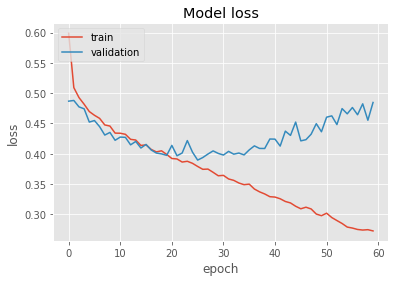

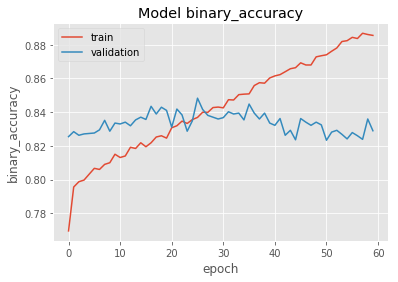

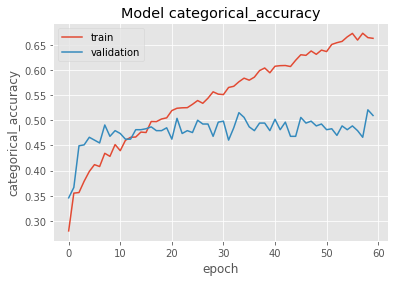

In [28]:
plot_history(history)

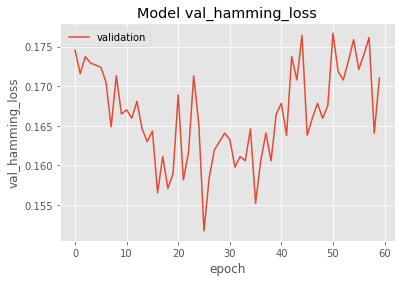

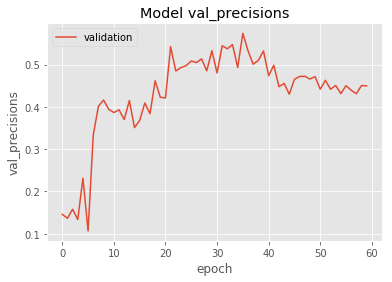

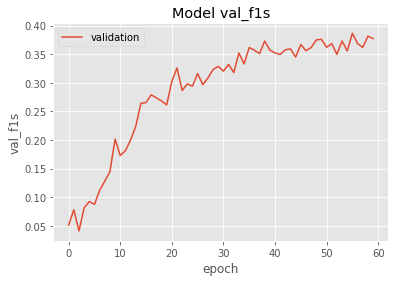

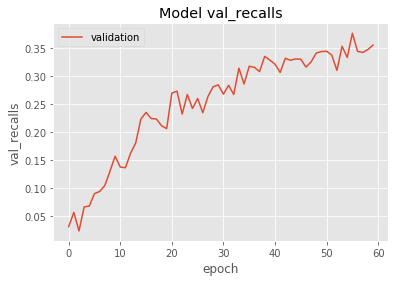

In [29]:
plot_metrics(metrics)

### Avaliar a precisão do modelo
As métricas do Keras *não* são válidas pois elas assumem que predizer um 0 é um bom sinal. Como na maioria das vezes tem muitos zeros então elas avaliam bem o modelo. 

O pedaço de código abaixo faz uma predição no conjunto de validação e muda as probabilidades para zeros e uns. 

Verificamos a métrica hamming_loss (quanto menor melhor)

Também vemos quantos foram preditos corretamente. Aqui só vale se bater corretamente

In [30]:
predictions = model.predict(eval_x)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

from sklearn.metrics import hamming_loss
print("Hamming Loss:",hamming_loss(eval_y,predictions))

# a diferença entre o ground truth e predições será toda 0 quando os dois forem iguais
## Então buscamos desses não dão tudo 0 e tiramos o inverso disso
predicted_diference = eval_y-predictions
correcly_predicted = (np.where(~(predicted_diference).any(axis=1))[0])
print("Total of correcly predicted:",correcly_predicted.shape[0])
print("Accuracy of correclty predicted:", float(correcly_predicted.shape[0])/eval_y.shape[0])

('Hamming Loss:', 0.17105263157894737)
('Total of correcly predicted:', 180)
('Accuracy of correclty predicted:', 0.3383458646616541)


In [31]:
labels = ["Wind","Thunder","Rain","Ocean","Fire","Explosion","Gunshot, gunfire"]
multilabel_confusion_matrix(eval_y,predictions,n_classes)

Multilabel Confusion Matrix
  TP,   FP,     TN,     FN, 
0 115	89	270	58
1 9	13	466	44
2 40	42	398	52
3 25	55	415	37
4 3	7	465	57
5 16	28	449	39
6 77	31	339	85
Σ 285	265	2802	372

F1 Score: 0.377326
Recall: 0.355540
Precision: 0.449960
Hamming Loss: 0.171053


## Conv1d
Ele usa layers de convolução 1D. Assim não precisamos pré-processar o dados de nenuma forma adicional, apenas é necessário que o input X tenha 3 dimensões.

In [17]:
import keras.backend as K
from keras import regularizers
from keras.layers import Lambda
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau


m = Sequential()
m.add(Conv1D(256,
             input_shape=(None, 1),
             kernel_size=80,
             strides=4,
             padding='same',
             kernel_initializer='glorot_uniform',
             kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling1D(pool_size=4, strides=None))
m.add(Conv1D(256,
             kernel_size=3,
             strides=1,
             padding='same',
             kernel_initializer='glorot_uniform',
             kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))


m.add(MaxPooling1D(pool_size=4, strides=None))
m.add(Lambda(lambda x: K.mean(x, axis=1)))
m.add(Dense(n_classes, activation='sigmoid'))

m.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['categorical_accuracy'])

In [18]:
#https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d

expanded_train_x = np.expand_dims(train_x, axis=2)
print(expanded_train_x.shape)

expanded_eval_x = np.expand_dims(eval_x, axis=2)
print(expanded_eval_x.shape)

(3465, 193, 1)
(532, 193, 1)


In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, min_lr=0.0001, verbose=1)
#earlystop = EarlyStopping(monitor='val_acc',patience=50, verbose=0, mode='max')

batch_size = 128
history = m.fit(x=expanded_train_x,
      y=train_y,
      batch_size=batch_size,
      epochs=60,
      verbose=1,
      shuffle=True,
      validation_data=(expanded_eval_x,eval_y))
      #validation_split=0.1,
      #callbacks=[reduce_lr])
                

Train on 3465 samples, validate on 532 samples
Epoch 1/60
3465/3465 [==============================] - 5s 1ms/step - loss: 0.5151 - categorical_accuracy: 0.3896 - val_loss: 0.6648 - val_categorical_accuracy: 0.2312
Epoch 2/60
3465/3465 [==============================] - 4s 1ms/step - loss: 0.4709 - categorical_accuracy: 0.4251 - val_loss: 0.5828 - val_categorical_accuracy: 0.2782
Epoch 3/60
3465/3465 [==============================] - 4s 1ms/step - loss: 0.4579 - categorical_accuracy: 0.4537 - val_loss: 0.5030 - val_categorical_accuracy: 0.3459
Epoch 4/60
3465/3465 [==============================] - 4s 1ms/step - loss: 0.4512 - categorical_accuracy: 0.4646 - val_loss: 0.4616 - val_categorical_accuracy: 0.4098
Epoch 5/60
3465/3465 [==============================] - 4s 1ms/step - loss: 0.4464 - categorical_accuracy: 0.4661 - val_loss: 0.4925 - val_categorical_accuracy: 0.3383
Epoch 6/60
3465/3465 [==============================] - 4s 1ms/step - loss: 0.4404 - categorical_accuracy: 0.4926

History keys: ['val_categorical_accuracy', 'loss', 'categorical_accuracy', 'val_loss']


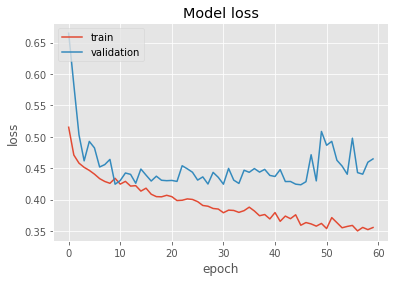

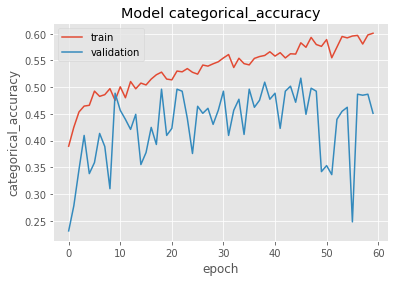

In [20]:
plot_history(history)

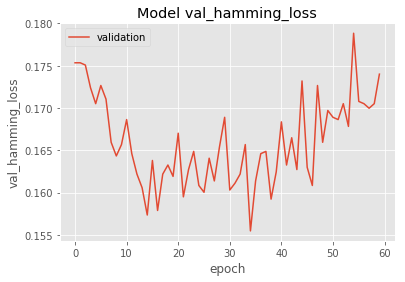

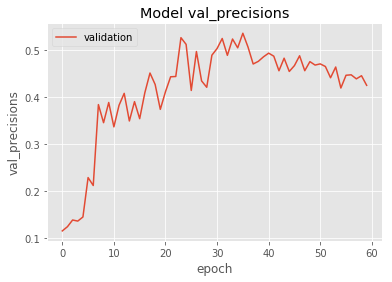

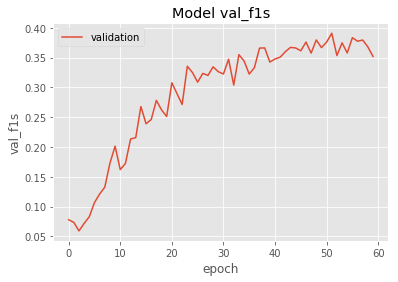

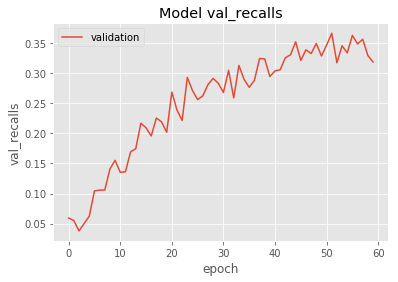

In [21]:
plot_metrics(metrics)

In [25]:
predictions = m.predict(expanded_eval_x)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

from sklearn.metrics import hamming_loss
print("Hamming Loss:",hamming_loss(eval_y,predictions))

# a diferença entre o ground truth e predições será toda 0 quando os dois forem iguais
## Então buscamos desses não dão tudo 0 e tiramos o inverso disso
predicted_diference = eval_y-predictions
correcly_predicted = (np.where(~(predicted_diference).any(axis=1))[0])
print("Total of correcly predicted:",correcly_predicted.shape[0])
print("Accuracy of correclty predicted:", float(correcly_predicted.shape[0])/eval_y.shape[0])

('Hamming Loss:', 0.17400644468313642)
('Total of correcly predicted:', 131)
('Accuracy of correclty predicted:', 0.2462406015037594)


## Cnn

Para esta precisamos de um mapa de features em 2D. Conseguimos isso usandos o trecho de código de :
https://github.com/jaron/deep-listening/blob/master/3-us8k-cnn-extract-train.ipynb

Basicamente, nós cortamos os features de train_x em diversas camadas em 41 quadros sobrepostos, um para cada uma das 60 mfcc, dando uma matriz de 60 linhas e 41 colunas. 
Se o clipe de som for maior que o tamanho esperado, esse processo vai criar várias features, uma para cada "corte" de som. 

Se, por exemplo mudamos os quadros de 41 para 91, vai nos dar menos features duplicadas para trabalhar. 

In [54]:
# hiperparâmetros
frames = 101
bands = 60
feature_size = bands * frames #60x41
num_labels = train_y.shape[1]
num_channels = 2

In [39]:
## teste ao carregar apenas um áudio

def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size / 2)
        
def extract_feature_array_cnn(filename, bands = 60, frames = 41):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    sound_clip,s = librosa.load(filename)
    for (start,end) in windows(sound_clip,window_size):
        start = int(start)
        end = int(end)
        if(len(sound_clip[start:end]) == window_size):
            signal = sound_clip[start:end]
            melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
            logspec = librosa.logamplitude(melspec)
            logspec = logspec.T.flatten()[:, np.newaxis].T
            log_specgrams.append(logspec)
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    for i in range(len(features)):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features)

sample_filename = data_dir+"unbalanced_train/audio/3641_4kRDE90UGRg.aac"
features = extract_feature_array_cnn(sample_filename, frames = 41)
data_points, _ = librosa.load(sample_filename)
print ("IN: Initial Data Points =", len(data_points))
print ("OUT: Total features =", np.shape(features))

('IN: Initial Data Points =', 274944)
('OUT: Total features =', (25, 60, 41, 2))


### Extrair features e transformar em 2D

In [55]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size / 2)

def extract_features(parent_dir,sub_dir,csv_file,file_ext="*.wav",bands = 60, frames = 41):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    file_labels = []
    count = 0
    for fn in natural_sort(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))):
        sound_clip,s = librosa.load(fn)
        print('Processing Line #' + str(count))
        print('features for ' + fn + ' extracted.')
        for (start,end) in windows(sound_clip,window_size):
            if(len(sound_clip[start:end]) == int(window_size)):
                signal = sound_clip[start:end]
                melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
                logspec = librosa.logamplitude(melspec)
                logspec = logspec.T.flatten()[:, np.newaxis].T
                log_specgrams.append(logspec)

                # Need to get the labels for each clip from the CSV file
                rownum = fn.split(sub_dir)[1].split('/')[1].split('_')[0]
                #print('rownum = ' + str(rownum))
                labels = (get_file_name_labels_from_audioset_csv(rownum,csv_file))
                file_labels.append(labels)
        
        count += 1
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    for i in range(len(features)):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features), np.array(file_labels)


In [51]:

# Use this only to save the feature vectors

features, labels = extract_features(data_dir,train_sub_dir,audioset_train_csv,"*.aac")
save_dir = data_dir+train_sub_dir+"/features/cnn/"
assure_path_exists(save_dir)
save_files(save_dir,features,labels)


features, labels = extract_features(data_dir,eval_sub_dir,audioset_eval_csv,"*.aac")
save_dir = data_dir+eval_sub_dir+"/features/cnn/"
assure_path_exists(save_dir)
save_files(save_dir,features,labels)

Processing Line #0
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/0_-iSwmbSS9TA.aac extracted.
Processing Line #1
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1_7UC6F9xm8nw.aac extracted.
Processing Line #2
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2_7TQwJ8LQz4A.aac extracted.
Processing Line #3
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3_1grT1gN5v8U.aac extracted.
Processing Line #4
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/4_OI5FodTedic.aac extracted.
Processing Line #5
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/5_Fr0UKnvvaTc.aac extracted.
Processing Line #6
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/6_OYHJKP9Dvak.aac extracted.
Processing Line #7
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/7_2u8_vL8Ey8c.aac extracted.
Processing Line #8
features for 

Processing Line #67
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/70_-VExWGv9Kh8.aac extracted.
Processing Line #68
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/71_6LbgvAdN5OI.aac extracted.
Processing Line #69
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/72_3sMtgbnMNO0.aac extracted.
Processing Line #70
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/73_8GSve1VF-90.aac extracted.
Processing Line #71
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/74_A_qMGStJkH4.aac extracted.
Processing Line #72
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/75_-QMhidDu3qw.aac extracted.
Processing Line #73
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/76_6JxtSOM9ODE.aac extracted.
Processing Line #74
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/77_4kJIAn9qBlU.aac extracted.
Processing Line 

Processing Line #134
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/141_3T2qX9IEiSA.aac extracted.
Processing Line #135
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/142_7kepKzYLyPs.aac extracted.
Processing Line #136
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/143_5ZpWRCiORfU.aac extracted.
Processing Line #137
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/144_9IshV__iHbE.aac extracted.
Processing Line #138
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/145_-GDkljH9Hsg.aac extracted.
Processing Line #139
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/146_3MIb8jRyNQU.aac extracted.
Processing Line #140
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/147_1ywJflmdH1c.aac extracted.
Processing Line #141
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/148_2NfK15_x6ws.aac extracted.


Processing Line #200
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/208_BGdfc2Ht1dk.aac extracted.
Processing Line #201
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/209_B1VulfX0yno.aac extracted.
Processing Line #202
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/210_0_wlxUxfZ14.aac extracted.
Processing Line #203
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/211_MFCVZQnHzhg.aac extracted.
Processing Line #204
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/212_88CzQRAOYoQ.aac extracted.
Processing Line #205
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/214_3SiIgfc9RyA.aac extracted.
Processing Line #206
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/215_-E4MGocy8o4.aac extracted.
Processing Line #207
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/216_CH52etGYvGM.aac extracted.


Processing Line #266
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/277_3TlrefO7WD0.aac extracted.
Processing Line #267
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/278_2kcgCeT9duM.aac extracted.
Processing Line #268
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/279_2F6quyMLi3I.aac extracted.
Processing Line #269
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/280_MsuJN7dM19o.aac extracted.
Processing Line #270
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/281_1AAPrleul7w.aac extracted.
Processing Line #271
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/282_2U5IaVxPceA.aac extracted.
Processing Line #272
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/283_8gvTkR8gcxk.aac extracted.
Processing Line #273
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/284_-JaUsb1_IbI.aac extracted.


Processing Line #332
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/345_RS4f4OMeD2c.aac extracted.
Processing Line #333
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/346_1FxW00i4cIk.aac extracted.
Processing Line #334
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/347_4wgF2LGdNbw.aac extracted.
Processing Line #335
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/348_2NOBkkK56wA.aac extracted.
Processing Line #336
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/349_6Pg8Ca92FkY.aac extracted.
Processing Line #337
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/350_4ixdDPS5meo.aac extracted.
Processing Line #338
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/351_3l1E5zvutbQ.aac extracted.
Processing Line #339
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/352_5C2gKklMuMM.aac extracted.


Processing Line #398
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/414_BBekupvkuxQ.aac extracted.
Processing Line #399
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/415_4XN9HiX5lJE.aac extracted.
Processing Line #400
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/416_2GvM-Qro1Ys.aac extracted.
Processing Line #401
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/417_1NlvLx2WNAU.aac extracted.
Processing Line #402
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/418_0SA-aOKsd40.aac extracted.
Processing Line #403
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/419_4J2IBtl8-1A.aac extracted.
Processing Line #404
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/420_Ew3wehHO3wo.aac extracted.
Processing Line #405
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/421_5tLJm8kbjnI.aac extracted.


Processing Line #464
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/481_-x9XedQDq1Q.aac extracted.
Processing Line #465
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/482_eqAwXkbCL40.aac extracted.
Processing Line #466
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/483_XXRuKKCAxI8.aac extracted.
Processing Line #467
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/484_-jfgImes0Wc.aac extracted.
Processing Line #468
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/485_0DixzJEVelg.aac extracted.
Processing Line #469
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/486_5ZN7URkabX0.aac extracted.
Processing Line #470
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/487_3nIz7NOua08.aac extracted.
Processing Line #471
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/488_M6euJ0teIj0.aac extracted.


Processing Line #530
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/550_1FOLZG2yNqA.aac extracted.
Processing Line #531
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/551_m2ZeGZ7CHZw.aac extracted.
Processing Line #532
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/552_-Es4a6NHq1k.aac extracted.
Processing Line #533
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/553_I-nJHccJLMY.aac extracted.
Processing Line #534
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/554_NnDaIk0xIMU.aac extracted.
Processing Line #535
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/555_-Chm_TzeYjA.aac extracted.
Processing Line #536
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/557_6IyOxth-IMg.aac extracted.
Processing Line #537
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/558_0cWuAA1LrWQ.aac extracted.


Processing Line #596
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/621_0k2sJx7E3Qk.aac extracted.
Processing Line #597
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/622_7hWENAfcY0U.aac extracted.
Processing Line #598
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/623_69nE-KI-W8k.aac extracted.
Processing Line #599
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/624_0J0uMddRv0Y.aac extracted.
Processing Line #600
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/625_27lYMGDot1s.aac extracted.
Processing Line #601
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/626_AEPQ7O7-2Vk.aac extracted.
Processing Line #602
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/627_4tyGWo--YEM.aac extracted.
Processing Line #603
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/628_J53-Sz5B6Hw.aac extracted.


Processing Line #662
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/691_6yOv8sO6KJU.aac extracted.
Processing Line #663
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/692_PBu9BQsiuss.aac extracted.
Processing Line #664
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/693_wIRwhJgfBlA.aac extracted.
Processing Line #665
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/694_AebaCWVL4FA.aac extracted.
Processing Line #666
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/695_4KaDm3tTKKc.aac extracted.
Processing Line #667
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/696_5Riyt6HcKT4.aac extracted.
Processing Line #668
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/698_786sF5BXjc8.aac extracted.
Processing Line #669
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/699_AZ5UXCfZXNM.aac extracted.


Processing Line #728
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/759_9y5Em2zH17E.aac extracted.
Processing Line #729
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/760_2_v6WYJ-bCw.aac extracted.
Processing Line #730
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/761_-pS1iVTSpmU.aac extracted.
Processing Line #731
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/762_4yvS6NRKn_o.aac extracted.
Processing Line #732
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/763_6cf7NTCuGuk.aac extracted.
Processing Line #733
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/764_-I2UgD8y7lA.aac extracted.
Processing Line #734
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/765_97ys4svJuEE.aac extracted.
Processing Line #735
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/766_9ev8OxdUMwM.aac extracted.


Processing Line #794
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/827_0S4hnlDVZ0g.aac extracted.
Processing Line #795
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/828_50h8l9uZlJ4.aac extracted.
Processing Line #796
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/829_UOtVGjTvkTQ.aac extracted.
Processing Line #797
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/830_8fIylsR0Qy8.aac extracted.
Processing Line #798
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/831_1nK_Ol90Kms.aac extracted.
Processing Line #799
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/832_-fqqe48M5Lc.aac extracted.
Processing Line #800
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/834_1uMjZcNQ6Ps.aac extracted.
Processing Line #801
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/835_59mNEcZljVw.aac extracted.


Processing Line #860
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/904_1K5S91gW6Dg.aac extracted.
Processing Line #861
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/905_A27JN5Z7Uhs.aac extracted.
Processing Line #862
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/906_3xAyd3Esc_Q.aac extracted.
Processing Line #863
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/907_2IXudSUpAOo.aac extracted.
Processing Line #864
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/908_40K80HDkBXg.aac extracted.
Processing Line #865
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/909_MU1383zAS_8.aac extracted.
Processing Line #866
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/910_Nwd_UTGfOPQ.aac extracted.
Processing Line #867
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/911_2_HrVmVAAvE.aac extracted.


Processing Line #926
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/973_0QuAGr_qtZs.aac extracted.
Processing Line #927
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/974_HpWgE39uRzE.aac extracted.
Processing Line #928
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/975_LcCfU5_Lwu0.aac extracted.
Processing Line #929
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/976_0TQmkmGdFdk.aac extracted.
Processing Line #930
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/977_5JRiLHzqFLE.aac extracted.
Processing Line #931
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/978_Tsbvkb-kbi4.aac extracted.
Processing Line #932
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/979_gr64fvZEDZ0.aac extracted.
Processing Line #933
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/980_Ep72tyiL3as.aac extracted.


Processing Line #992
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1042_-FXgPsF8hqk.aac extracted.
Processing Line #993
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1043_-FRz2m7Dg1I.aac extracted.
Processing Line #994
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1044_6Nc0yKRpYRE.aac extracted.
Processing Line #995
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1045_-M0Sh9gBDEk.aac extracted.
Processing Line #996
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1047_1hDB9vb-gOk.aac extracted.
Processing Line #997
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1048_CPbqvVooEC0.aac extracted.
Processing Line #998
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1049_5cYQOqeZ67E.aac extracted.
Processing Line #999
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1050_r8LWlOQvTA4.aac ext

Processing Line #1057
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1112_2MY-1yRCIY0.aac extracted.
Processing Line #1058
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1113_Pge0T-z0c0o.aac extracted.
Processing Line #1059
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1114_2fdx5Ad69mE.aac extracted.
Processing Line #1060
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1115_7-j2ykUyBmQ.aac extracted.
Processing Line #1061
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1116_1lMN9N4DBOc.aac extracted.
Processing Line #1062
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1117_DVij-xNuDuY.aac extracted.
Processing Line #1063
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1118_Wos4M6jVLMg.aac extracted.
Processing Line #1064
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1119_Dkd6xs-FbYs

Processing Line #1122
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1177_6xC7Wokz36I.aac extracted.
Processing Line #1123
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1178_-C3rrh6dDjE.aac extracted.
Processing Line #1124
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1179_5amoP37cIk0.aac extracted.
Processing Line #1125
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1180_ATtYO_IUr0Y.aac extracted.
Processing Line #1126
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1181_3E6WRXTR9-s.aac extracted.
Processing Line #1127
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1182_6Kd72D2vP_U.aac extracted.
Processing Line #1128
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1183_0P01HpD3Hsg.aac extracted.
Processing Line #1129
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1184_0PTKWyGio7M

Processing Line #1187
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1246_2ShHAjuICms.aac extracted.
Processing Line #1188
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1247_1l2CkcwAVNE.aac extracted.
Processing Line #1189
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1248_2R8BSHUBDPY.aac extracted.
Processing Line #1190
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1249_uUcw1P_0Jus.aac extracted.
Processing Line #1191
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1250_3l2qP9YClBw.aac extracted.
Processing Line #1192
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1251_CrO5TBhKZns.aac extracted.
Processing Line #1193
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1252_TqdpNEvc-Ac.aac extracted.
Processing Line #1194
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1253_-EjIWnnYgpc

Processing Line #1252
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1315_5GpJ8vae9y0.aac extracted.
Processing Line #1253
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1316_DLC6OJph5p8.aac extracted.
Processing Line #1254
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1317_43Gwmx22EpM.aac extracted.
Processing Line #1255
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1318_8-Q8jt_-mvA.aac extracted.
Processing Line #1256
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1319_7uV8lVtq1lc.aac extracted.
Processing Line #1257
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1320_DhxJUwB9zxk.aac extracted.
Processing Line #1258
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1321_6F1pn7Af2Y4.aac extracted.
Processing Line #1259
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1322_3wg6s_SLERo

Processing Line #1317
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1384_6Pp1KMNaTJg.aac extracted.
Processing Line #1318
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1385_eq8HMqxobgc.aac extracted.
Processing Line #1319
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1386_8fb6o9-ooGQ.aac extracted.
Processing Line #1320
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1387_IG2xXfY84k8.aac extracted.
Processing Line #1321
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1388_11CtJUD-zHg.aac extracted.
Processing Line #1322
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1389_27AmdTI4hmc.aac extracted.
Processing Line #1323
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1390_3LP8b_3wO2s.aac extracted.
Processing Line #1324
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1391_87GkqrDnMhg

Processing Line #1382
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1451_-rkT63HBpjE.aac extracted.
Processing Line #1383
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1452_EqRkP1ssfgI.aac extracted.
Processing Line #1384
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1453_0_4ZIVuWDlw.aac extracted.
Processing Line #1385
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1454_AV_ulC9-hrs.aac extracted.
Processing Line #1386
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1455_HLSA8weFNCk.aac extracted.
Processing Line #1387
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1456_73FfGYOcAMk.aac extracted.
Processing Line #1388
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1457_4K4nxEzFLYc.aac extracted.
Processing Line #1389
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1459_1e98HeU9Vrg

Processing Line #1447
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1522_-9jguMTsT_k.aac extracted.
Processing Line #1448
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1523_QTEGEclMjvI.aac extracted.
Processing Line #1449
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1524_OfGCs4q7WBk.aac extracted.
Processing Line #1450
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1525_Kovg7t2111w.aac extracted.
Processing Line #1451
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1526_2ijJeXRSmQ0.aac extracted.
Processing Line #1452
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1527_1O-Zym6eibo.aac extracted.
Processing Line #1453
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1528_5HhgMgBUSn8.aac extracted.
Processing Line #1454
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1529_6UGBghRQcH0

Processing Line #1512
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1593_A4txcAJfbQ0.aac extracted.
Processing Line #1513
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1594_-7TpSmofVDo.aac extracted.
Processing Line #1514
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1595_CWwyiIC2Y3w.aac extracted.
Processing Line #1515
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1596_8VY_ue1pdms.aac extracted.
Processing Line #1516
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1597_6601TQwtPm0.aac extracted.
Processing Line #1517
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1598_Br3ovluJWMw.aac extracted.
Processing Line #1518
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1599_0bg1nzEVdgY.aac extracted.
Processing Line #1519
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1600_-rnJiLdXiWw

Processing Line #1577
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1658_L7ZKTWmgqdk.aac extracted.
Processing Line #1578
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1659_2HLtTNVcJLI.aac extracted.
Processing Line #1579
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1660_8pbpzdwlM90.aac extracted.
Processing Line #1580
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1661_2f_dQzHTTco.aac extracted.
Processing Line #1581
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1662_7eu51kBsiFY.aac extracted.
Processing Line #1582
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1663_1gRHHFHarUQ.aac extracted.
Processing Line #1583
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1664_6B65oeTkCq8.aac extracted.
Processing Line #1584
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1665_2pYiCVsb9vs

Processing Line #1642
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1727_1hzbwQPDvJA.aac extracted.
Processing Line #1643
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1728_6kakhLgjjQE.aac extracted.
Processing Line #1644
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1729_AsJMiyhPhLc.aac extracted.
Processing Line #1645
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1731_R40DkjVSHl0.aac extracted.
Processing Line #1646
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1732_3jFUHPSo4rY.aac extracted.
Processing Line #1647
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1733_1N8cmXJeOdw.aac extracted.
Processing Line #1648
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1735_3wXTCc25k2Q.aac extracted.
Processing Line #1649
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1736_2OqixGNTw7c

Processing Line #1707
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1799_yXavVcAPMIA.aac extracted.
Processing Line #1708
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1801_PpIe84e3xnc.aac extracted.
Processing Line #1709
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1802_0-jc_qX7QE8.aac extracted.
Processing Line #1710
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1803_2t1vtpZzGAE.aac extracted.
Processing Line #1711
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1804_BlGB75_IQp8.aac extracted.
Processing Line #1712
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1805_7AW5ICp3WxM.aac extracted.
Processing Line #1713
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1806_3MhoOCk6NRQ.aac extracted.
Processing Line #1714
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1807_0gySryz-JLo

Processing Line #1772
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1866_ulmCjnYltSc.aac extracted.
Processing Line #1773
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1867_HaeHR6TubdE.aac extracted.
Processing Line #1774
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1868_4aDtICkkrqg.aac extracted.
Processing Line #1775
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1869_1xvkw3QEkvk.aac extracted.
Processing Line #1776
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1870_3epeaXqHgkw.aac extracted.
Processing Line #1777
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1871_GW7_ltqWIPA.aac extracted.
Processing Line #1778
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1872_ArIvmpoANm4.aac extracted.
Processing Line #1779
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1873_6lmRnGpNa2k

Processing Line #1837
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1933_5TSaGQvNWio.aac extracted.
Processing Line #1838
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1934_85quy8zURmw.aac extracted.
Processing Line #1839
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1935_LqhjQLbxtcI.aac extracted.
Processing Line #1840
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1936_K-dxFCpj9mM.aac extracted.
Processing Line #1841
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1937_6xRj56-pcPE.aac extracted.
Processing Line #1842
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1938_Agc_qEs90Uw.aac extracted.
Processing Line #1843
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1939_60vnalEyMjg.aac extracted.
Processing Line #1844
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/1940_1sXaIDCrktk

Processing Line #1902
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2003_5oktN4INwhg.aac extracted.
Processing Line #1903
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2004_0piEiKDuvd8.aac extracted.
Processing Line #1904
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2005_3DHm_I7hRZQ.aac extracted.
Processing Line #1905
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2006_2WIuLOWNmQw.aac extracted.
Processing Line #1906
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2007_AgL91l_DkRs.aac extracted.
Processing Line #1907
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2008_8SiE8AyPIgY.aac extracted.
Processing Line #1908
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2009_QPSdgaY1cyU.aac extracted.
Processing Line #1909
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2010_0xWD_SlWXBM

Processing Line #1967
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2070_6pas527vlZY.aac extracted.
Processing Line #1968
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2072_5Q0DghRl5Fg.aac extracted.
Processing Line #1969
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2073_4Ukpz-_BsgI.aac extracted.
Processing Line #1970
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2074_7A4Hk5-0VDQ.aac extracted.
Processing Line #1971
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2075_03vVQsJ44-Q.aac extracted.
Processing Line #1972
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2076_O1_gQ3I6oZE.aac extracted.
Processing Line #1973
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2077_68aISalVOVU.aac extracted.
Processing Line #1974
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2078_3TgOVCLNXn4

Processing Line #2032
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2141_3-LN4fjshgQ.aac extracted.
Processing Line #2033
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2142_DN8Y9OTg9JA.aac extracted.
Processing Line #2034
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2143_-IgLXOL0DKw.aac extracted.
Processing Line #2035
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2144_7yKz5XPaZZo.aac extracted.
Processing Line #2036
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2145_001Gw4vIiHo.aac extracted.
Processing Line #2037
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2146_J9hb_jBQn_I.aac extracted.
Processing Line #2038
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2147_6qGYLqjUStQ.aac extracted.
Processing Line #2039
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2148_ONMboNj4hLo

Processing Line #2097
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2209_LXCjGrKn7A0.aac extracted.
Processing Line #2098
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2210_58ZdrvFgS1c.aac extracted.
Processing Line #2099
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2211_8OmExa4ItS8.aac extracted.
Processing Line #2100
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2212_0nlRmG32y50.aac extracted.
Processing Line #2101
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2213_4VaSjLV-GLs.aac extracted.
Processing Line #2102
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2214_2UFTCXrS1SQ.aac extracted.
Processing Line #2103
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2215_hMZR31TN-Uc.aac extracted.
Processing Line #2104
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2216_SIJqjbi5aJg

Processing Line #2162
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2277_77eV2YFJwgc.aac extracted.
Processing Line #2163
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2278_26lMTlwyOAM.aac extracted.
Processing Line #2164
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2279_7CXNDbLCG0I.aac extracted.
Processing Line #2165
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2280_8XoFQvKnc3U.aac extracted.
Processing Line #2166
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2281_9z2OwpftxUE.aac extracted.
Processing Line #2167
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2282_8_BVgK6YQV0.aac extracted.
Processing Line #2168
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2283_HBgFODWGn2E.aac extracted.
Processing Line #2169
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2284_787efDWRVyE

Processing Line #2227
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2348_6XN4-JAMUwc.aac extracted.
Processing Line #2228
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2349_8kNH56gJpHc.aac extracted.
Processing Line #2229
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2350_R5xcTsW95zw.aac extracted.
Processing Line #2230
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2351_QW_VEkgRsQs.aac extracted.
Processing Line #2231
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2352_7DD9zNYXyLE.aac extracted.
Processing Line #2232
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2353_-3lYmHGfkX4.aac extracted.
Processing Line #2233
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2354_13gko4-3PzY.aac extracted.
Processing Line #2234
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2355_2GNSiLWVgyk

Processing Line #2292
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2416_4EMHsIJLk3c.aac extracted.
Processing Line #2293
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2417_-XVOFBNSAms.aac extracted.
Processing Line #2294
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2418_0PULDXBleUw.aac extracted.
Processing Line #2295
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2419_6zrqX5Em4NQ.aac extracted.
Processing Line #2296
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2420_MIoiYOU80n4.aac extracted.
Processing Line #2297
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2421_MZlnlgbESR8.aac extracted.
Processing Line #2298
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2422_-n3tv_VWXwY.aac extracted.
Processing Line #2299
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2423_CHYx1fe5yO8

Processing Line #2357
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2483_kkUOxVpb7c4.aac extracted.
Processing Line #2358
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2485_27WoP2yRsFU.aac extracted.
Processing Line #2359
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2486_7W-z6F-JP0k.aac extracted.
Processing Line #2360
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2487_1P0BQdXRXZo.aac extracted.
Processing Line #2361
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2488_KniufpODcOg.aac extracted.
Processing Line #2362
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2489_0tDUaqm40Ds.aac extracted.
Processing Line #2363
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2490_6cC37XbJlXQ.aac extracted.
Processing Line #2364
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2491_FsZXOP_VLY0

Processing Line #2422
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2552_I-YyPU3se1g.aac extracted.
Processing Line #2423
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2553_GOkwfi33ikQ.aac extracted.
Processing Line #2424
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2554_3-PaiV6gNNY.aac extracted.
Processing Line #2425
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2555_gCzT4KTMpuE.aac extracted.
Processing Line #2426
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2556_37sfyhEXjV0.aac extracted.
Processing Line #2427
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2557_9OGoXWb7l50.aac extracted.
Processing Line #2428
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2558_4joZZL17RUM.aac extracted.
Processing Line #2429
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2559_2O3moXVfc5k

Processing Line #2487
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2621_27bCX_aDVqE.aac extracted.
Processing Line #2488
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2622_0r0oT8c85-U.aac extracted.
Processing Line #2489
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2623_3gV6QMj0fvQ.aac extracted.
Processing Line #2490
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2624_INf7TxjEWoI.aac extracted.
Processing Line #2491
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2625_2sMkEGqilvA.aac extracted.
Processing Line #2492
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2626_4tfwQGvz9lA.aac extracted.
Processing Line #2493
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2627_PKZ1hLe8F3k.aac extracted.
Processing Line #2494
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2628_UVCpaFUbmGA

Processing Line #2552
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2690_3LV1az1a1Y0.aac extracted.
Processing Line #2553
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2691_4JPaf_bQzhA.aac extracted.
Processing Line #2554
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2692_-H9M6cZGd18.aac extracted.
Processing Line #2555
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2693_nADdBFPOvVE.aac extracted.
Processing Line #2556
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2694_0IDRVIfrAYM.aac extracted.
Processing Line #2557
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2695_AFVzauLzK_Q.aac extracted.
Processing Line #2558
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2696_-wW0vFmhpm8.aac extracted.
Processing Line #2559
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2697_0PWJ3ZFiMkQ

Processing Line #2617
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2756_5Uz4Di8ESNE.aac extracted.
Processing Line #2618
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2757_Con6OzOlkE4.aac extracted.
Processing Line #2619
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2758_49Aksz7NMCQ.aac extracted.
Processing Line #2620
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2759_DH0Lv6TGuo8.aac extracted.
Processing Line #2621
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2760_Dr9DBk-7H28.aac extracted.
Processing Line #2622
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2761_AnO7mJEbiSM.aac extracted.
Processing Line #2623
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2762_-musqdIrZMQ.aac extracted.
Processing Line #2624
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2763_7pN_UdUam0s

Processing Line #2682
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2822_EdazskPLBJI.aac extracted.
Processing Line #2683
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2823_55J1oe5ZCgM.aac extracted.
Processing Line #2684
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2824_2VDyWTKKKTs.aac extracted.
Processing Line #2685
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2825_4kqNo2Iphpg.aac extracted.
Processing Line #2686
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2826_3HYAhvqQzxQ.aac extracted.
Processing Line #2687
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2827_2BcOrblHL_A.aac extracted.
Processing Line #2688
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2828_BDq3KyOOxNY.aac extracted.
Processing Line #2689
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2829_1zk8NmLUbY4

Processing Line #2747
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2888_CcjGYEsy8Dg.aac extracted.
Processing Line #2748
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2889_O1oAy43sJjg.aac extracted.
Processing Line #2749
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2890_BCM3JyV3-00.aac extracted.
Processing Line #2750
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2891_2sdRiS7rMI0.aac extracted.
Processing Line #2751
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2893_7H-p0c-DVr0.aac extracted.
Processing Line #2752
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2894_8RPUXWeXhSQ.aac extracted.
Processing Line #2753
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2895_1KZVbKCakgE.aac extracted.
Processing Line #2754
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2896_2j11JAKx2PE

Processing Line #2812
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2959_Q2IPVA2WJOE.aac extracted.
Processing Line #2813
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2960_GafcFzYXmHE.aac extracted.
Processing Line #2814
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2961_9zW0p-YlMhQ.aac extracted.
Processing Line #2815
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2962_51k6-TAvO9w.aac extracted.
Processing Line #2816
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2963_4DAlx955cQA.aac extracted.
Processing Line #2817
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2964_4WeoaGEUtjU.aac extracted.
Processing Line #2818
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2965_5EFYHBn7660.aac extracted.
Processing Line #2819
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/2966_4pzoUVvYdLc

Processing Line #2877
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3028_EpjA5BwIS-k.aac extracted.
Processing Line #2878
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3029_D66xoA6MX9Q.aac extracted.
Processing Line #2879
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3030_zyLh8k4k5pM.aac extracted.
Processing Line #2880
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3032_7O-oeCMO5D4.aac extracted.
Processing Line #2881
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3033_4HQ10INKJBw.aac extracted.
Processing Line #2882
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3034_3wJSOpRLkj0.aac extracted.
Processing Line #2883
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3036_-uOln399Geg.aac extracted.
Processing Line #2884
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3037_A0i8HZghZZQ

Processing Line #2942
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3101_GJbfVBLsuQA.aac extracted.
Processing Line #2943
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3102_2b84YkokNnk.aac extracted.
Processing Line #2944
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3103_D8YbgI1sglw.aac extracted.
Processing Line #2945
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3104_0lFEDXLnV54.aac extracted.
Processing Line #2946
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3105_8tUBzLupnSs.aac extracted.
Processing Line #2947
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3106_Lf0uRoEQPHo.aac extracted.
Processing Line #2948
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3107_4pYhTgVPIGc.aac extracted.
Processing Line #2949
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3108_HEpgktnN7gI

Processing Line #3007
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3169_-njbxsKaclk.aac extracted.
Processing Line #3008
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3170_ebilq6k9Duo.aac extracted.
Processing Line #3009
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3171_5ebn3mUsFjo.aac extracted.
Processing Line #3010
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3173_A4sahTq42mk.aac extracted.
Processing Line #3011
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3174_5gHDg0looKM.aac extracted.
Processing Line #3012
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3175_3OmQYpy9bIA.aac extracted.
Processing Line #3013
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3176_-5EYBhN62f4.aac extracted.
Processing Line #3014
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3177_AL5CKtbwtRw

Processing Line #3072
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3239_AvGyw4Sc_yo.aac extracted.
Processing Line #3073
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3240_7pUe_uJ4zlI.aac extracted.
Processing Line #3074
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3241_8HgLxmUCTPI.aac extracted.
Processing Line #3075
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3242_f_PApGBNRTY.aac extracted.
Processing Line #3076
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3243_7k-0ub30ggU.aac extracted.
Processing Line #3077
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3244_16YAY4Bot-8.aac extracted.
Processing Line #3078
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3245_2JULbhgKzUE.aac extracted.
Processing Line #3079
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3246_-17PBbWKfzs

Processing Line #3137
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3305_5zaHWN_orI4.aac extracted.
Processing Line #3138
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3306_O1ZLCotPiQw.aac extracted.
Processing Line #3139
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3307_8UCas1-M3eU.aac extracted.
Processing Line #3140
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3308_BahaHFHnZGo.aac extracted.
Processing Line #3141
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3309_4R2pTpgHX58.aac extracted.
Processing Line #3142
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3310_-HtRQ4ewyd4.aac extracted.
Processing Line #3143
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3311_OaAeEM-9pI0.aac extracted.
Processing Line #3144
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3312_3c-adJGlHGY

Processing Line #3202
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3375_P29K9L5fLNo.aac extracted.
Processing Line #3203
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3376_F3zOnohscGI.aac extracted.
Processing Line #3204
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3377_5Ehgo2dKD3c.aac extracted.
Processing Line #3205
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3378_9z-OozkONaw.aac extracted.
Processing Line #3206
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3379_CJTjo79ZMOA.aac extracted.
Processing Line #3207
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3380_4iEh6lp1cbM.aac extracted.
Processing Line #3208
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3381_0GZTtQG4ijI.aac extracted.
Processing Line #3209
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3382_2-DgzCaJZ70

Processing Line #3267
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3448_6euJjfL06r4.aac extracted.
Processing Line #3268
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3449_5fehW3z4sqw.aac extracted.
Processing Line #3269
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3450_5K17Pioj4kM.aac extracted.
Processing Line #3270
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3451_2IGNI1xCMqU.aac extracted.
Processing Line #3271
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3452_0D4zMJfjwUU.aac extracted.
Processing Line #3272
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3453_RH2inNvNIlE.aac extracted.
Processing Line #3273
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3454_44SFF_eAlQ4.aac extracted.
Processing Line #3274
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3455_387smksUmR0

Processing Line #3332
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3516_NAgUSBl7KGc.aac extracted.
Processing Line #3333
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3517_1GobhTaLBcI.aac extracted.
Processing Line #3334
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3518_1c3x_SG3HK8.aac extracted.
Processing Line #3335
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3519_MBOUXUm0dow.aac extracted.
Processing Line #3336
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3520_00ZeXwkse50.aac extracted.
Processing Line #3337
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3521_2WkzPxRuio8.aac extracted.
Processing Line #3338
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3522_-pe3220aP0A.aac extracted.
Processing Line #3339
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3523_7t1Nb-pRlCY

Processing Line #3397
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3585_63KW_EQ72yU.aac extracted.
Processing Line #3398
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3586_94Dogkx6gC0.aac extracted.
Processing Line #3399
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3587_3II3mgbe55o.aac extracted.
Processing Line #3400
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3588_-byeuxn5LEI.aac extracted.
Processing Line #3401
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3589_m4HFyiFiL0E.aac extracted.
Processing Line #3402
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3590_0J3iRi1U0vw.aac extracted.
Processing Line #3403
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3591_5AmXwiaO-qo.aac extracted.
Processing Line #3404
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3592_Cp93MgEa7TA

Processing Line #3462
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3654_4PSjjjeOElo.aac extracted.
Processing Line #3463
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3655_-02sZMlMYIk.aac extracted.
Processing Line #3464
features for /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/3656_4yV_I_KsklM.aac extracted.
73345
7
Features of =  (73345, 60, 41, 2)
Labels of =  (73345, 7)
Saved /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/features/cnn/_x.npy
Saved /home/rabreu/projeto_multimodal/data/unbalanced_train/audio/features/cnn/_y.npy
Processing Line #0
features for /home/rabreu/projeto_multimodal/data/eval/audio/0_-22tna7KHzI.aac extracted.
Processing Line #1
features for /home/rabreu/projeto_multimodal/data/eval/audio/1_-3-4qmWSJXU.aac extracted.
Processing Line #2
features for /home/rabreu/projeto_multimodal/data/eval/audio/2_-3rHVsIj1M8.aac extracted.
Processing Line #3
features for /home/rabreu/projeto_m

Processing Line #69
features for /home/rabreu/projeto_multimodal/data/eval/audio/76_6SVS8wrJ1yY.aac extracted.
Processing Line #70
features for /home/rabreu/projeto_multimodal/data/eval/audio/77_6agTJDB5lno.aac extracted.
Processing Line #71
features for /home/rabreu/projeto_multimodal/data/eval/audio/78_6vlK5YIeFQE.aac extracted.
Processing Line #72
features for /home/rabreu/projeto_multimodal/data/eval/audio/79_74MFxrG2aSI.aac extracted.
Processing Line #73
features for /home/rabreu/projeto_multimodal/data/eval/audio/80_7CTzN_wSb6g.aac extracted.
Processing Line #74
features for /home/rabreu/projeto_multimodal/data/eval/audio/81_7LoVjl-6wlc.aac extracted.
Processing Line #75
features for /home/rabreu/projeto_multimodal/data/eval/audio/82_7OyCsvavJNA.aac extracted.
Processing Line #76
features for /home/rabreu/projeto_multimodal/data/eval/audio/83_7R8QaecvJzA.aac extracted.
Processing Line #77
features for /home/rabreu/projeto_multimodal/data/eval/audio/84_7RlyBtFDd98.aac extracted.
P

Processing Line #142
features for /home/rabreu/projeto_multimodal/data/eval/audio/155_DIxTruxPbdk.aac extracted.
Processing Line #143
features for /home/rabreu/projeto_multimodal/data/eval/audio/156_DK1tZljrwAc.aac extracted.
Processing Line #144
features for /home/rabreu/projeto_multimodal/data/eval/audio/157_DKN30Bwf_HQ.aac extracted.
Processing Line #145
features for /home/rabreu/projeto_multimodal/data/eval/audio/158_DLMKy0_82iw.aac extracted.
Processing Line #146
features for /home/rabreu/projeto_multimodal/data/eval/audio/159_DSGMDArb1QI.aac extracted.
Processing Line #147
features for /home/rabreu/projeto_multimodal/data/eval/audio/160_D_GfvnDbRJk.aac extracted.
Processing Line #148
features for /home/rabreu/projeto_multimodal/data/eval/audio/161_D_MavKxL6oc.aac extracted.
Processing Line #149
features for /home/rabreu/projeto_multimodal/data/eval/audio/162_DfqTZNWTpfg.aac extracted.
Processing Line #150
features for /home/rabreu/projeto_multimodal/data/eval/audio/163_Dj9gyAoqmQ

Processing Line #215
features for /home/rabreu/projeto_multimodal/data/eval/audio/235_LuJyXlL3S_M.aac extracted.
Processing Line #216
features for /home/rabreu/projeto_multimodal/data/eval/audio/236_LvHVrKhkKBE.aac extracted.
Processing Line #217
features for /home/rabreu/projeto_multimodal/data/eval/audio/237_M7rGKqfZh6k.aac extracted.
Processing Line #218
features for /home/rabreu/projeto_multimodal/data/eval/audio/238_MECAfSOzUY8.aac extracted.
Processing Line #219
features for /home/rabreu/projeto_multimodal/data/eval/audio/239_MMB2VR0087w.aac extracted.
Processing Line #220
features for /home/rabreu/projeto_multimodal/data/eval/audio/240_Mgd0Hsgl8gU.aac extracted.
Processing Line #221
features for /home/rabreu/projeto_multimodal/data/eval/audio/241_MjTuAV036yY.aac extracted.
Processing Line #222
features for /home/rabreu/projeto_multimodal/data/eval/audio/242_MnEZwnRuQR8.aac extracted.
Processing Line #223
features for /home/rabreu/projeto_multimodal/data/eval/audio/243_MrHp70quN9

Processing Line #288
features for /home/rabreu/projeto_multimodal/data/eval/audio/311_V-lj5QvZYBo.aac extracted.
Processing Line #289
features for /home/rabreu/projeto_multimodal/data/eval/audio/312_V2OjPsg7ydY.aac extracted.
Processing Line #290
features for /home/rabreu/projeto_multimodal/data/eval/audio/313_V3qChNAYuCQ.aac extracted.
Processing Line #291
features for /home/rabreu/projeto_multimodal/data/eval/audio/315_VEmOUHxessE.aac extracted.
Processing Line #292
features for /home/rabreu/projeto_multimodal/data/eval/audio/316_VHoOg4twnO0.aac extracted.
Processing Line #293
features for /home/rabreu/projeto_multimodal/data/eval/audio/318_Vdh_JIJCLxA.aac extracted.
Processing Line #294
features for /home/rabreu/projeto_multimodal/data/eval/audio/319_VdruTK0Xpik.aac extracted.
Processing Line #295
features for /home/rabreu/projeto_multimodal/data/eval/audio/320_VvpjmyUhvP0.aac extracted.
Processing Line #296
features for /home/rabreu/projeto_multimodal/data/eval/audio/321_Vw-veOw_YJ

Processing Line #361
features for /home/rabreu/projeto_multimodal/data/eval/audio/390_cy7yYRlsmwA.aac extracted.
Processing Line #362
features for /home/rabreu/projeto_multimodal/data/eval/audio/391_d3eq6JLipyk.aac extracted.
Processing Line #363
features for /home/rabreu/projeto_multimodal/data/eval/audio/392_d7I4Z5t8Xdo.aac extracted.
Processing Line #364
features for /home/rabreu/projeto_multimodal/data/eval/audio/393_dF4XD6bFsWY.aac extracted.
Processing Line #365
features for /home/rabreu/projeto_multimodal/data/eval/audio/394_dHM1QdoRmiU.aac extracted.
Processing Line #366
features for /home/rabreu/projeto_multimodal/data/eval/audio/395_dLRlnhW9_Pc.aac extracted.
Processing Line #367
features for /home/rabreu/projeto_multimodal/data/eval/audio/396_dMQANiWPPME.aac extracted.
Processing Line #368
features for /home/rabreu/projeto_multimodal/data/eval/audio/397_dP2M0N8a-64.aac extracted.
Processing Line #369
features for /home/rabreu/projeto_multimodal/data/eval/audio/398_d_Hdkt1_iv

Processing Line #434
features for /home/rabreu/projeto_multimodal/data/eval/audio/471_lSr8MKcWTdo.aac extracted.
Processing Line #435
features for /home/rabreu/projeto_multimodal/data/eval/audio/472_ldVtte9jK-s.aac extracted.
Processing Line #436
features for /home/rabreu/projeto_multimodal/data/eval/audio/474_m-XV3AbXE3o.aac extracted.
Processing Line #437
features for /home/rabreu/projeto_multimodal/data/eval/audio/475_mA9Rin6YF5w.aac extracted.
Processing Line #438
features for /home/rabreu/projeto_multimodal/data/eval/audio/476_mC7nCm_mnwA.aac extracted.
Processing Line #439
features for /home/rabreu/projeto_multimodal/data/eval/audio/477_mHiOGhxbmdo.aac extracted.
Processing Line #440
features for /home/rabreu/projeto_multimodal/data/eval/audio/478_mOHPhSz4vMA.aac extracted.
Processing Line #441
features for /home/rabreu/projeto_multimodal/data/eval/audio/479_mTM0WQRcfNU.aac extracted.
Processing Line #442
features for /home/rabreu/projeto_multimodal/data/eval/audio/480_maxlwbbBWU

Processing Line #507
features for /home/rabreu/projeto_multimodal/data/eval/audio/548_vn_LymlQAnc.aac extracted.
Processing Line #508
features for /home/rabreu/projeto_multimodal/data/eval/audio/550_wVMkSyxQ6IM.aac extracted.
Processing Line #509
features for /home/rabreu/projeto_multimodal/data/eval/audio/551_wgg6YgGx4Rk.aac extracted.
Processing Line #510
features for /home/rabreu/projeto_multimodal/data/eval/audio/552_wrLwSUzx0ek.aac extracted.
Processing Line #511
features for /home/rabreu/projeto_multimodal/data/eval/audio/553_wuz0curb_hg.aac extracted.
Processing Line #512
features for /home/rabreu/projeto_multimodal/data/eval/audio/554_wzjeayE_MWo.aac extracted.
Processing Line #513
features for /home/rabreu/projeto_multimodal/data/eval/audio/555_x7RLEgi_tGU.aac extracted.
Processing Line #514
features for /home/rabreu/projeto_multimodal/data/eval/audio/556_xFdFAEY7eTc.aac extracted.
Processing Line #515
features for /home/rabreu/projeto_multimodal/data/eval/audio/557_xLgjhRyyYc

In [65]:
# Load up numpy arrays to save time if they have already been procesed.

save_dir = data_dir+train_sub_dir+"/features/cnn/"
feature_file = os.path.join(save_dir + '_x.npy')
labels_file = os.path.join(save_dir + '_y.npy')
train_x = np.load(feature_file)
train_y = np.load(labels_file)
print(train_x.shape)


save_dir = data_dir+eval_sub_dir+"/features/cnn/"
feature_file = os.path.join(save_dir + '_x.npy')
labels_file = os.path.join(save_dir + '_y.npy')
eval_x = np.load(feature_file)
eval_y = np.load(labels_file)
print(eval_x.shape)

(73345, 60, 41, 2)
(11463, 60, 41, 2)


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils


model = Sequential()
# input: 60x41 data frames with 2 channels => (60,41,2) tensors

# filters of size 1x1 
f_size = 1

# first layer has 48 convolution filters 
model.add(Convolution2D(48, f_size, strides=f_size, kernel_initializer='normal', padding='same', input_shape=(bands, frames, num_channels)))
model.add(Convolution2D(48, f_size, strides=f_size, kernel_initializer='normal', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# next layer has 96 convolution filters
model.add(Convolution2D(96, f_size, strides=f_size, kernel_initializer='normal', padding='same'))
model.add(Convolution2D(96, f_size, strides=f_size, kernel_initializer='normal', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# flatten output into a single dimension 
# Keras will do shape inference automatically
model.add(Flatten())

# then a fully connected NN layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# finally, an output layer with one node per class
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

# use the Adam optimiser
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)
#sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=True)

model.compile(loss='binary_crossentropy', metrics=['categorical_accuracy'], optimizer=adam)


In [67]:
history = model.fit(x = train_x,
                    y = train_y,
                    validation_data=(eval_x,eval_y),
                    batch_size=128,
                    epochs=30)

Train on 73345 samples, validate on 11463 samples
Epoch 1/30
73345/73345 [==============================] - 322s 4ms/step - loss: 0.4598 - categorical_accuracy: 0.4043 - val_loss: 0.4558 - val_categorical_accuracy: 0.4110
Epoch 2/30
73345/73345 [==============================] - 382s 5ms/step - loss: 0.4391 - categorical_accuracy: 0.4369 - val_loss: 0.4267 - val_categorical_accuracy: 0.4327
Epoch 3/30
73345/73345 [==============================] - 382s 5ms/step - loss: 0.4332 - categorical_accuracy: 0.4470 - val_loss: 0.4113 - val_categorical_accuracy: 0.4632
Epoch 4/30
73345/73345 [==============================] - 383s 5ms/step - loss: 0.4256 - categorical_accuracy: 0.4591 - val_loss: 0.4209 - val_categorical_accuracy: 0.4306
Epoch 5/30
73345/73345 [==============================] - 383s 5ms/step - loss: 0.4204 - categorical_accuracy: 0.4685 - val_loss: 0.4072 - val_categorical_accuracy: 0.4487
Epoch 6/30
73345/73345 [==============================] - 382s 5ms/step - loss: 0.4170 - c

History keys: ['val_categorical_accuracy', 'loss', 'categorical_accuracy', 'val_loss']


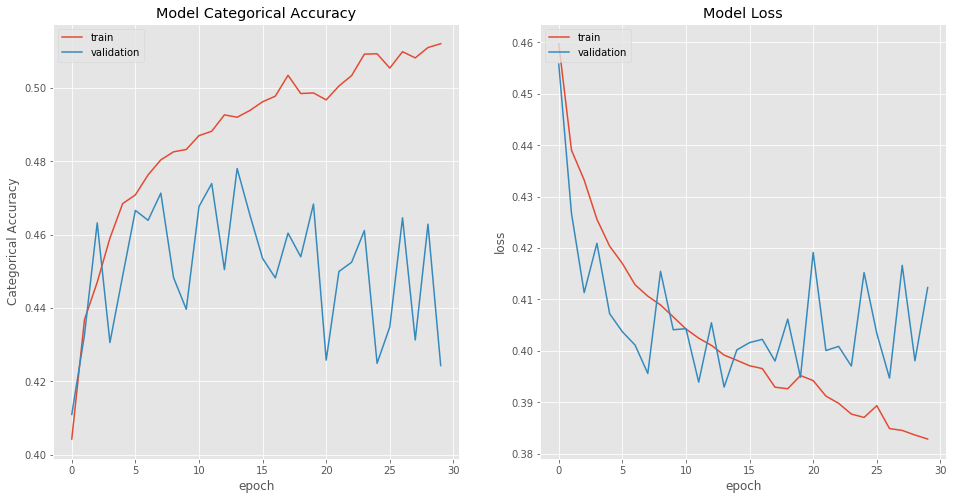

In [68]:
plot_history(history)

In [82]:
pred_y = model.predict([eval_x])
pred_y[pred_y>=0.5] = 1
pred_y[pred_y<0.5] = 0


from sklearn.metrics import hamming_loss
print(hamming_loss(eval_y,y_pred))

# a diferença entre o ground truth e predições será toda 0 quando os dois forem iguais
## Então buscamos desses não dão tudo 0 e tiramos o inverso disso
predicted_diference = eval_y-pred_y
correcly_predicted = (np.where(~(predicted_diference).any(axis=1))[0])
print("Total of correcly predicted:",correcly_predicted.shape[0])
print("Accuracy of correclty predicted:", float(correcly_predicted.shape[0])/eval_y.shape[0])

## If you want to make sure that they are really equal
#for x in correcly_predicted:
#    print np.array_equal(predictions[x], eval_y[x])

0.289639959622
('Total of correcly predicted:', 2241)
('Accuracy of correclty predicted:', 0.19549856058623397)


## LSTM


In [83]:

#exemplo com um áudio

def extract_feature_array_lstm(filename, bands = 20, frames = 41):
    window_size = 512 * (frames - 1)
    mfccs = []
    sound_clip,s = librosa.load(filename)
    for (start,end) in windows(sound_clip,window_size):
        if(len(sound_clip[start:end]) == window_size):
            signal = sound_clip[start:end]
            mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
            mfccs.append(mfcc)
            
    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features)

sample_filename = data_dir+"unbalanced_train/audio/3641_4kRDE90UGRg.aac"
features = extract_feature_array_lstm(sample_filename)
data_points, _ = librosa.load(sample_filename)
print ("IN: Initial Data Points =", len(data_points))
print ("OUT: Total features =", np.shape(features))


('IN: Initial Data Points =', 274944)
('OUT: Total features =', (25, 20, 41))


In [84]:
def extract_features_lstm(parent_dir,sub_dir,csv_file,file_ext="*.wav",bands = 20, frames = 41):
    window_size = 512 * (frames - 1)
    mfccs = []
    file_labels = []
    count = 0
    for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
        sound_clip,s = librosa.load(fn)
        print('Processing Line #' + str(count))
        for (start,end) in windows(sound_clip,window_size):
            if(len(sound_clip[start:end]) == window_size):
                signal = sound_clip[start:end]
                mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
                mfccs.append(mfcc)

                # Need to get the labels for each clip from the CSV file
                rownum = fn.split(sub_dir)[1].split('/')[1].split('_')[0]
                #print('rownum = ' + str(rownum))
                labels = (get_file_name_labels_from_audioset_csv(rownum,csv_file))
                file_labels.append(labels)
        count += 1        
    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features), np.array(file_labels)


### Salvar

In [59]:
# uncomment this to save the feature vectors

features, labels = extract_features_lstm(data_dir,train_sub_dir,audioset_train_csv,"*.aac")
save_dir = data_dir+train_sub_dir+"/features/lstm/"
assure_path_exists(save_dir)
save_files(save_dir,features,labels)




features, labels = extract_features_lstm(data_dir,eval_sub_dir,audioset_eval_csv,"*.aac")
save_dir = data_dir+eval_sub_dir+"/features/lstm/"
assure_path_exists(save_dir)
save_files(save_dir,features,labels)


print(" labels",labels.shape , "Features" ,features.shape)

Processing Line #0
Processing Line #1
Processing Line #2
Processing Line #3
Processing Line #4
Processing Line #5
Processing Line #6
Processing Line #7
Processing Line #8
Processing Line #9
Processing Line #10
Processing Line #11
Processing Line #12
Processing Line #13
Processing Line #14
Processing Line #15
Processing Line #16
Processing Line #17
Processing Line #18
Processing Line #19
Processing Line #20
Processing Line #21
Processing Line #22
Processing Line #23
Processing Line #24
Processing Line #25
Processing Line #26
Processing Line #27
Processing Line #28
Processing Line #29
Processing Line #30
Processing Line #31
Processing Line #32
Processing Line #33
Processing Line #34
Processing Line #35
Processing Line #36
Processing Line #37
Processing Line #38
Processing Line #39
Processing Line #40
Processing Line #41
Processing Line #42
Processing Line #43
Processing Line #44
Processing Line #45
Processing Line #46
Processing Line #47
Processing Line #48
Processing Line #49
Processing

Processing Line #396
Processing Line #397
Processing Line #398
Processing Line #399
Processing Line #400
Processing Line #401
Processing Line #402
Processing Line #403
Processing Line #404
Processing Line #405
Processing Line #406
Processing Line #407
Processing Line #408
Processing Line #409
Processing Line #410
Processing Line #411
Processing Line #412
Processing Line #413
Processing Line #414
Processing Line #415
Processing Line #416
Processing Line #417
Processing Line #418
Processing Line #419
Processing Line #420
Processing Line #421
Processing Line #422
Processing Line #423
Processing Line #424
Processing Line #425
Processing Line #426
Processing Line #427
Processing Line #428
Processing Line #429
Processing Line #430
Processing Line #431
Processing Line #432
Processing Line #433
Processing Line #434
Processing Line #435
Processing Line #436
Processing Line #437
Processing Line #438
Processing Line #439
Processing Line #440
Processing Line #441
Processing Line #442
Processing Li

Processing Line #787
Processing Line #788
Processing Line #789
Processing Line #790
Processing Line #791
Processing Line #792
Processing Line #793
Processing Line #794
Processing Line #795
Processing Line #796
Processing Line #797
Processing Line #798
Processing Line #799
Processing Line #800
Processing Line #801
Processing Line #802
Processing Line #803
Processing Line #804
Processing Line #805
Processing Line #806
Processing Line #807
Processing Line #808
Processing Line #809
Processing Line #810
Processing Line #811
Processing Line #812
Processing Line #813
Processing Line #814
Processing Line #815
Processing Line #816
Processing Line #817
Processing Line #818
Processing Line #819
Processing Line #820
Processing Line #821
Processing Line #822
Processing Line #823
Processing Line #824
Processing Line #825
Processing Line #826
Processing Line #827
Processing Line #828
Processing Line #829
Processing Line #830
Processing Line #831
Processing Line #832
Processing Line #833
Processing Li

Processing Line #1170
Processing Line #1171
Processing Line #1172
Processing Line #1173
Processing Line #1174
Processing Line #1175
Processing Line #1176
Processing Line #1177
Processing Line #1178
Processing Line #1179
Processing Line #1180
Processing Line #1181
Processing Line #1182
Processing Line #1183
Processing Line #1184
Processing Line #1185
Processing Line #1186
Processing Line #1187
Processing Line #1188
Processing Line #1189
Processing Line #1190
Processing Line #1191
Processing Line #1192
Processing Line #1193
Processing Line #1194
Processing Line #1195
Processing Line #1196
Processing Line #1197
Processing Line #1198
Processing Line #1199
Processing Line #1200
Processing Line #1201
Processing Line #1202
Processing Line #1203
Processing Line #1204
Processing Line #1205
Processing Line #1206
Processing Line #1207
Processing Line #1208
Processing Line #1209
Processing Line #1210
Processing Line #1211
Processing Line #1212
Processing Line #1213
Processing Line #1214
Processing

Processing Line #1543
Processing Line #1544
Processing Line #1545
Processing Line #1546
Processing Line #1547
Processing Line #1548
Processing Line #1549
Processing Line #1550
Processing Line #1551
Processing Line #1552
Processing Line #1553
Processing Line #1554
Processing Line #1555
Processing Line #1556
Processing Line #1557
Processing Line #1558
Processing Line #1559
Processing Line #1560
Processing Line #1561
Processing Line #1562
Processing Line #1563
Processing Line #1564
Processing Line #1565
Processing Line #1566
Processing Line #1567
Processing Line #1568
Processing Line #1569
Processing Line #1570
Processing Line #1571
Processing Line #1572
Processing Line #1573
Processing Line #1574
Processing Line #1575
Processing Line #1576
Processing Line #1577
Processing Line #1578
Processing Line #1579
Processing Line #1580
Processing Line #1581
Processing Line #1582
Processing Line #1583
Processing Line #1584
Processing Line #1585
Processing Line #1586
Processing Line #1587
Processing

Processing Line #1916
Processing Line #1917
Processing Line #1918
Processing Line #1919
Processing Line #1920
Processing Line #1921
Processing Line #1922
Processing Line #1923
Processing Line #1924
Processing Line #1925
Processing Line #1926
Processing Line #1927
Processing Line #1928
Processing Line #1929
Processing Line #1930
Processing Line #1931
Processing Line #1932
Processing Line #1933
Processing Line #1934
Processing Line #1935
Processing Line #1936
Processing Line #1937
Processing Line #1938
Processing Line #1939
Processing Line #1940
Processing Line #1941
Processing Line #1942
Processing Line #1943
Processing Line #1944
Processing Line #1945
Processing Line #1946
Processing Line #1947
Processing Line #1948
Processing Line #1949
Processing Line #1950
Processing Line #1951
Processing Line #1952
Processing Line #1953
Processing Line #1954
Processing Line #1955
Processing Line #1956
Processing Line #1957
Processing Line #1958
Processing Line #1959
Processing Line #1960
Processing

Processing Line #2289
Processing Line #2290
Processing Line #2291
Processing Line #2292
Processing Line #2293
Processing Line #2294
Processing Line #2295
Processing Line #2296
Processing Line #2297
Processing Line #2298
Processing Line #2299
Processing Line #2300
Processing Line #2301
Processing Line #2302
Processing Line #2303
Processing Line #2304
Processing Line #2305
Processing Line #2306
Processing Line #2307
Processing Line #2308
Processing Line #2309
Processing Line #2310
Processing Line #2311
Processing Line #2312
Processing Line #2313
Processing Line #2314
Processing Line #2315
Processing Line #2316
Processing Line #2317
Processing Line #2318
Processing Line #2319
Processing Line #2320
Processing Line #2321
Processing Line #2322
Processing Line #2323
Processing Line #2324
Processing Line #2325
Processing Line #2326
Processing Line #2327
Processing Line #2328
Processing Line #2329
Processing Line #2330
Processing Line #2331
Processing Line #2332
Processing Line #2333
Processing

Processing Line #2662
Processing Line #2663
Processing Line #2664
Processing Line #2665
Processing Line #2666
Processing Line #2667
Processing Line #2668
Processing Line #2669
Processing Line #2670
Processing Line #2671
Processing Line #2672
Processing Line #2673
Processing Line #2674
Processing Line #2675
Processing Line #2676
Processing Line #2677
Processing Line #2678
Processing Line #2679
Processing Line #2680
Processing Line #2681
Processing Line #2682
Processing Line #2683
Processing Line #2684
Processing Line #2685
Processing Line #2686
Processing Line #2687
Processing Line #2688
Processing Line #2689
Processing Line #2690
Processing Line #2691
Processing Line #2692
Processing Line #2693
Processing Line #2694
Processing Line #2695
Processing Line #2696
Processing Line #2697
Processing Line #2698
Processing Line #2699
Processing Line #2700
Processing Line #2701
Processing Line #2702
Processing Line #2703
Processing Line #2704
Processing Line #2705
Processing Line #2706
Processing

Processing Line #3035
Processing Line #3036
Processing Line #3037
Processing Line #3038
Processing Line #3039
Processing Line #3040
Processing Line #3041
Processing Line #3042
Processing Line #3043
Processing Line #3044
Processing Line #3045
Processing Line #3046
Processing Line #3047
Processing Line #3048
Processing Line #3049
Processing Line #3050
Processing Line #3051
Processing Line #3052
Processing Line #3053
Processing Line #3054
Processing Line #3055
Processing Line #3056
Processing Line #3057
Processing Line #3058
Processing Line #3059
Processing Line #3060
Processing Line #3061
Processing Line #3062
Processing Line #3063
Processing Line #3064
Processing Line #3065
Processing Line #3066
Processing Line #3067
Processing Line #3068
Processing Line #3069
Processing Line #3070
Processing Line #3071
Processing Line #3072
Processing Line #3073
Processing Line #3074
Processing Line #3075
Processing Line #3076
Processing Line #3077
Processing Line #3078
Processing Line #3079
Processing

Processing Line #3408
Processing Line #3409
Processing Line #3410
Processing Line #3411
Processing Line #3412
Processing Line #3413
Processing Line #3414
Processing Line #3415
Processing Line #3416
Processing Line #3417
Processing Line #3418
Processing Line #3419
Processing Line #3420
Processing Line #3421
Processing Line #3422
Processing Line #3423
Processing Line #3424
Processing Line #3425
Processing Line #3426
Processing Line #3427
Processing Line #3428
Processing Line #3429
Processing Line #3430
Processing Line #3431
Processing Line #3432
Processing Line #3433
Processing Line #3434
Processing Line #3435
Processing Line #3436
Processing Line #3437
Processing Line #3438
Processing Line #3439
Processing Line #3440
Processing Line #3441
Processing Line #3442
Processing Line #3443
Processing Line #3444
Processing Line #3445
Processing Line #3446
Processing Line #3447
Processing Line #3448
Processing Line #3449
Processing Line #3450
Processing Line #3451
Processing Line #3452
Processing

Processing Line #325
Processing Line #326
Processing Line #327
Processing Line #328
Processing Line #329
Processing Line #330
Processing Line #331
Processing Line #332
Processing Line #333
Processing Line #334
Processing Line #335
Processing Line #336
Processing Line #337
Processing Line #338
Processing Line #339
Processing Line #340
Processing Line #341
Processing Line #342
Processing Line #343
Processing Line #344
Processing Line #345
Processing Line #346
Processing Line #347
Processing Line #348
Processing Line #349
Processing Line #350
Processing Line #351
Processing Line #352
Processing Line #353
Processing Line #354
Processing Line #355
Processing Line #356
Processing Line #357
Processing Line #358
Processing Line #359
Processing Line #360
Processing Line #361
Processing Line #362
Processing Line #363
Processing Line #364
Processing Line #365
Processing Line #366
Processing Line #367
Processing Line #368
Processing Line #369
Processing Line #370
Processing Line #371
Processing Li

### Carregar

In [85]:
# Load up numpy arrays to save time if they have already been procesed.
save_dir = data_dir+train_sub_dir+"/features/lstm/"

feature_file = os.path.join(save_dir + '_x.npy')
labels_file = os.path.join(save_dir + '_y.npy')

train_x = np.load(feature_file)
train_y = np.load(labels_file)
print(train_x.shape)


save_dir = data_dir+eval_sub_dir+"/features/lstm/"

feature_file = os.path.join(save_dir + '_x.npy')
labels_file = os.path.join(save_dir + '_y.npy')

eval_x = np.load(feature_file)
eval_y = np.load(labels_file)

print(eval_x.shape)

(73345, 20, 41)
(11463, 20, 41)


### Rede

In [86]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

data_dim = 41
timesteps = 20
num_classes = 7

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()

# returns a sequence of vectors of dimension 256
model.add(LSTM(256, return_sequences=True, input_shape=(timesteps, data_dim)))  

model.add(Dropout(0.5))

# return a single vector of dimension 128
model.add(LSTM(128))  

model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# apply softmax to output
model.add(Dense(num_classes, activation='sigmoid'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)

# compile the model for multi-class classification
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['categorical_accuracy'])



history = model.fit(x = train_x,
                    y = train_y,
                    batch_size=128,
                    epochs=25,
                    validation_data=(eval_x,eval_y))

Train on 73345 samples, validate on 11463 samples
Epoch 1/25
10112/73345 [===>..........................] - ETA: 1:35 - loss: 0.4968 - categorical_accuracy: 0.3538

KeyboardInterrupt: 

History keys: ['val_categorical_accuracy', 'loss', 'categorical_accuracy', 'val_loss']


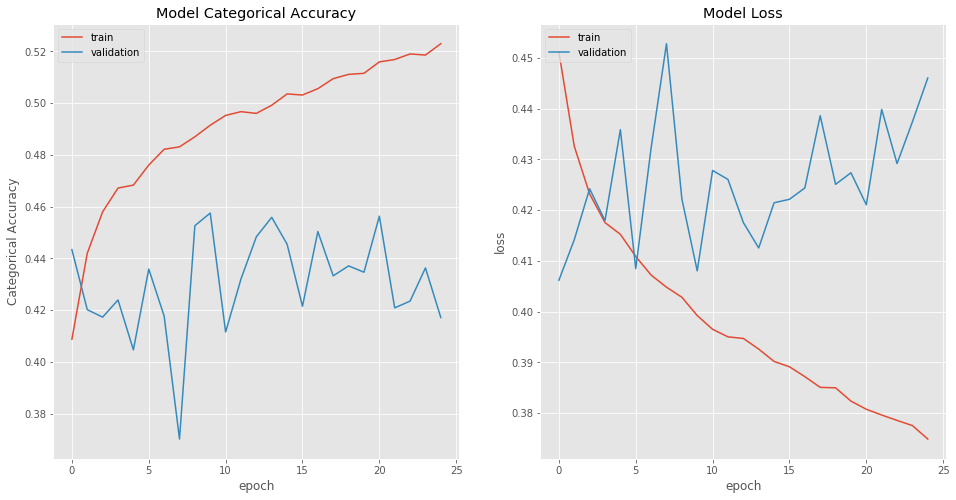

In [64]:
plot_history(history)